# Introduction

## Context
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

## Content
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

## Acknowledgements
The data is originally from the article [Hotel Booking Demand Datasets]("https://www.sciencedirect.com/science/article/pii/S2352340918315191"), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020.

## Column Description

This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel. This dataset has 32 columns with descriptions as following:

- __hotel__ : Hotel (H1 = Resort Hotel or H2 = City Hotel).
- __is_canceled__ : Value indicating if the booking was canceled (1) or not (0).
- __lead_time__ : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
- __arrival_date_year__ : Year of arrival date.
- __arrival_date_month__ : Month of arrival date.
- __arrival_date_week__ : Week number of year for arrival date.
- __arrival_date_day__ : Day of arrival date.
- __stays_in_week_nights__ : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
- __adults__ : Number of adults.
- __children__ : Number of children.
- __babies__ : Number of babies.
- __meal__ : Type of meal booked. Categories are presented in standard hospitality meal packages: 
        1. Undefined/SC – no meal package;
        2. BB – Bed & Breakfast;
        3. HB – Half board (breakfast and one other meal – usually dinner);
        4. FB – Full board (breakfast, lunch and dinner)
- __country__ : Country of origin. Categories are represented in the ISO 3155–3:2013 format
- __market_segment__ : Market segment designation. In categories, the term __TA__ means “Travel Agents” and __TO__ means “Tour Operators”.
- __distribution_channel__ : Booking distribution channel. The term __TA__ means “Travel Agents” and __TO__ means “Tour Operators”.
- __is_repeated_guest__ : Value indicating if the booking name was from a repeated guest (1) or not (0).
- __previous_cancellations__ : Number of previous bookings that were cancelled by the customer prior to the current booking.
- __previous_bookings_not_canceled__ : Number of previous bookings not cancelled by the customer prior to the current booking.
- __reserved_room_type__ : Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- __assigned_room_type__ : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons	
- __booking_changes__ : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
- __deposit_type__ : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:	BO and TR/Value calculated based on the payments identified for the booking in the transaction (TR) table before the booking׳s arrival or cancellation date.
        1. No Deposit – no deposit was made;
        2. Non Refund – a deposit was made in the value of the total stay cost;
        3. Refundable – a deposit was made with a value under the total cost of stay.
- __agent__ : ID of the travel agency that made the booking.
- __company__ : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
- __days_in_waiting_list__ : Number of days the booking was in the waiting list before it was confirmed to the customer
- __customer_type__ : Type of booking, assuming one of four categories:
        1. Contract - when the booking has an allotment or other type of contract associated to it;
        2. Group – when the booking is associated to a group;
        3. Transient – when the booking isn't part of a group/contract, and isn't associated to other transient booking.
        4. Transient-party – when the booking is transient, but is associated to at least other transient booking
- __adr__ : Average daily rate.
- __required_car_parking_spaces__ : Number of car parking spaces required by the customer.
- __total_of_special_requests__ : Number of special requests made by the customer (e.g. twin bed or high floor).
- __reservation_status__ : Reservation last status, assuming one of three categories:
        1. Canceled – booking was canceled by the customer;
        2. Check-Out – customer has checked in but already departed;
        3. No-Show – customer did not check-in and did inform the hotel of the reason why                    
- __reservation_status_date__ : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.

## Task
### Task Details
Can we predict the possibility of a booking for a hotel based on the previous_cancellation as the target?

### Expected Submission
Two columns --> Hotel Name and Booking_Possibility (0 or 1)

# Import Libraries and Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
# styledict, None, or one of {darkgrid, whitegrid, dark, white, ticks}

In [2]:
data = pd.read_csv("c:/Users/Acer/Downloads/Dataset_DataScience/EDA/Hotel Booking/hotel_bookings.csv")
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)
data.tail(10)

hotel  is_canceled  lead_time  arrival_date_year  \
119380  City Hotel            0         44               2017   
119381  City Hotel            0        188               2017   
119382  City Hotel            0        135               2017   
119383  City Hotel            0        164               2017   
119384  City Hotel            0         21               2017   
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119380             August                        35   
119381             August                        35   
119382             August                        35   
119383             August                        35   
119384             August                        35   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119380                         31                        1   
119381                         31                        2   
119382                         30                        2   
119383                         31                        2   
119384                         30                        2   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
119380                     3       2       0.0       0   SC     DEU   
119381                     3       2       0.0       0   BB     DEU   
119382                     4       3       0.0       0   BB     JPN   
119383                     4       2       0.0       0   BB     DEU   
119384                     5       2       0.0       0   BB     BEL   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
119380      Online TA                TA/TO                  0   
119381         Direct               Direct                  0   
119382      Online TA                TA/TO                  0   
119383  Offline TA/TO                TA/TO                  0   
119384  Offline TA/TO                TA/TO                  0   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
119380                       0                               0   
119381                       0                               0   
119382                       0                               0   
119383                       0                               0   
119384                       0                               0   
119385                       0                               0   
119386                       0                  

In [3]:
print("Showing info of Dataset:\n", data.info())
print("\nShape of Dataset:\n", data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Handling Missing Values

In [4]:
print("Number of Missing values in each column:\n")
data.isnull().sum()

Number of Missing values in each column:



hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Handling missing values from children, country, agent, and company columns.

In [5]:
# Filling the Null Values
data["children"] = data["children"].fillna(0)
data["country"] = data["country"].ffill(axis=0)
#we assume the null value has same values with the latest value of the null value.
data["agent"] = data["agent"].fillna(0)  
data["company"] = data["company"].fillna(0)

data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [6]:
# Change agent and company columns' datatypes to string
# it because both columns present ID.
data["agent"] = data["agent"].astype(str)
data["company"] = data["company"].astype(str)
# Change children column's datatype to int.
data["children"] = data["children"].astype(int)

# Data Explanotary

## Hotel

### Hotel: The Propotion of Passengers of Resort and City Hotel

Total passengers of Resort Hotel: 40060 passengers

Total passengers of City Hotel: 79330 passengers



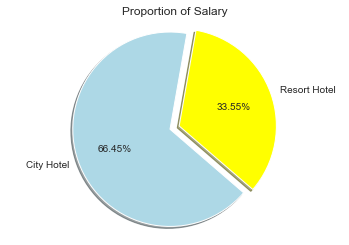

In [7]:
resort_hotel_sum = (data['hotel'] == 'Resort Hotel').sum()
city_hotel_sum = (data['hotel'] == 'City Hotel').sum()

print("Total passengers of Resort Hotel: {} passengers\n".format(resort_hotel_sum))
print("Total passengers of City Hotel: {} passengers\n".format(city_hotel_sum))

labels = ['City Hotel', 'Resort Hotel']

data_hotel = data['hotel'].value_counts()
pie_colors = ['Lightblue','Yellow']
my_explode = (0, 0.1)
plt.pie(data_hotel, labels=labels, autopct='%.2f%%', 
        startangle=80, shadow = True, colors=pie_colors, explode=my_explode)
plt.title('Proportion of Salary')
plt.axis('equal')
plt.show()

__City hotel has total passengers higher than resort hotel.__

### Hotel: Total Passengers of both hotels based on Cancellation

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Distribution of the hotel based on the cancellation status')]

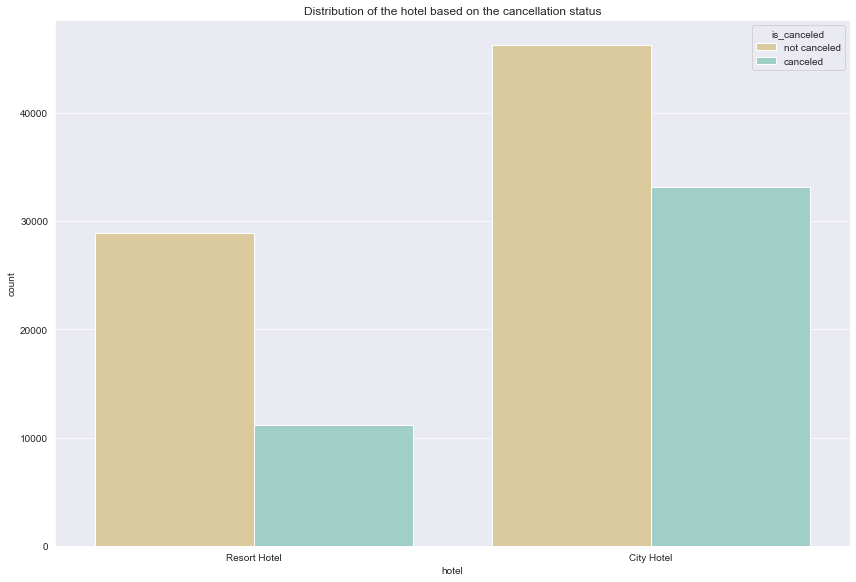

In [8]:
plt.figure(figsize=(12,8))
#1: canceled and 0: not canceled
data['is_canceled'].replace({1: 'canceled', 0: 'not canceled'}, inplace = True)
dist = sns.countplot(data['hotel'], hue = 'is_canceled', data = data, palette = 'BrBG');
plt.tight_layout()
dist.set(title = "Total passengers of both hotels based on the cancellation status")

__More passengers made cancellations at city hotels.__ 

In [9]:
rh_cancel = data['hotel'][((data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 'canceled'))].count()
ch_cancel = data['hotel'][((data['hotel'] == 'City Hotel') & (data['is_canceled'] == 'canceled'))].count()
rh_ncancel = data['hotel'][((data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 'not canceled'))].count()
ch_ncancel = data['hotel'][((data['hotel'] == 'City Hotel') & (data['is_canceled'] == 'not canceled'))].count()
              
rh_ch = {'Resort Hotel' : [rh_cancel, rh_ncancel],
        'City Hotel' : [ch_cancel, ch_ncancel]}

c_nc = ['not cancelled', 'cancelled']

df = pd.DataFrame(rh_ch, index=c_nc)
df

Resort Hotel  City Hotel
not cancelled         11122       33102
cancelled             28938       46228

### Hotel: Total Passengers per Year

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Total Passengers of both hotels per year')]

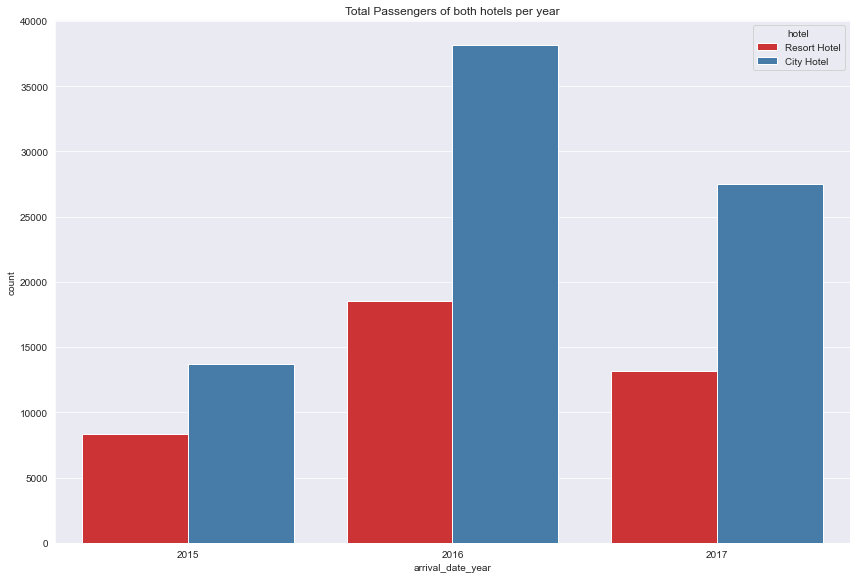

In [10]:
plt.figure(figsize=(12,8))
dist = sns.countplot(data['arrival_date_year'], hue = 'hotel', data = data, palette = 'Set1');
plt.tight_layout()
dist.set(title = "Total Passengers of both hotels per year")

In [11]:
rh_2015 = data['hotel'][((data['hotel'] == 'Resort Hotel') & (data['arrival_date_year'] == 2015))].count()
ch_2015 = data['hotel'][((data['hotel'] == 'City Hotel') & (data['arrival_date_year'] == 2015))].count()
rh_2016 = data['hotel'][((data['hotel'] == 'Resort Hotel') & (data['arrival_date_year'] == 2016))].count()
ch_2016 = data['hotel'][((data['hotel'] == 'City Hotel') & (data['arrival_date_year'] == 2016))].count()
rh_2017 = data['hotel'][((data['hotel'] == 'Resort Hotel') & (data['arrival_date_year'] == 2017))].count()
ch_2017 = data['hotel'][((data['hotel'] == 'City Hotel') & (data['arrival_date_year'] == 2017))].count()
    
rh_ch_y = {'Resort Hotel' : [rh_2015, rh_2016, rh_2017],
        'City Hotel' : [ch_2015, ch_2016, ch_2017]}

year = [2015, 2016, 2017]

df_y = pd.DataFrame(rh_ch_y, index=year)
df_y

Resort Hotel  City Hotel
2015          8314       13682
2016         18567       38140
2017         13179       27508

### Hotel: Total Passengers per Month

In [12]:
#`arrival_date_month` names converted to the numbers

data['arrival_date_month'].replace({'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)

Text(0, 0.5, 'Count')

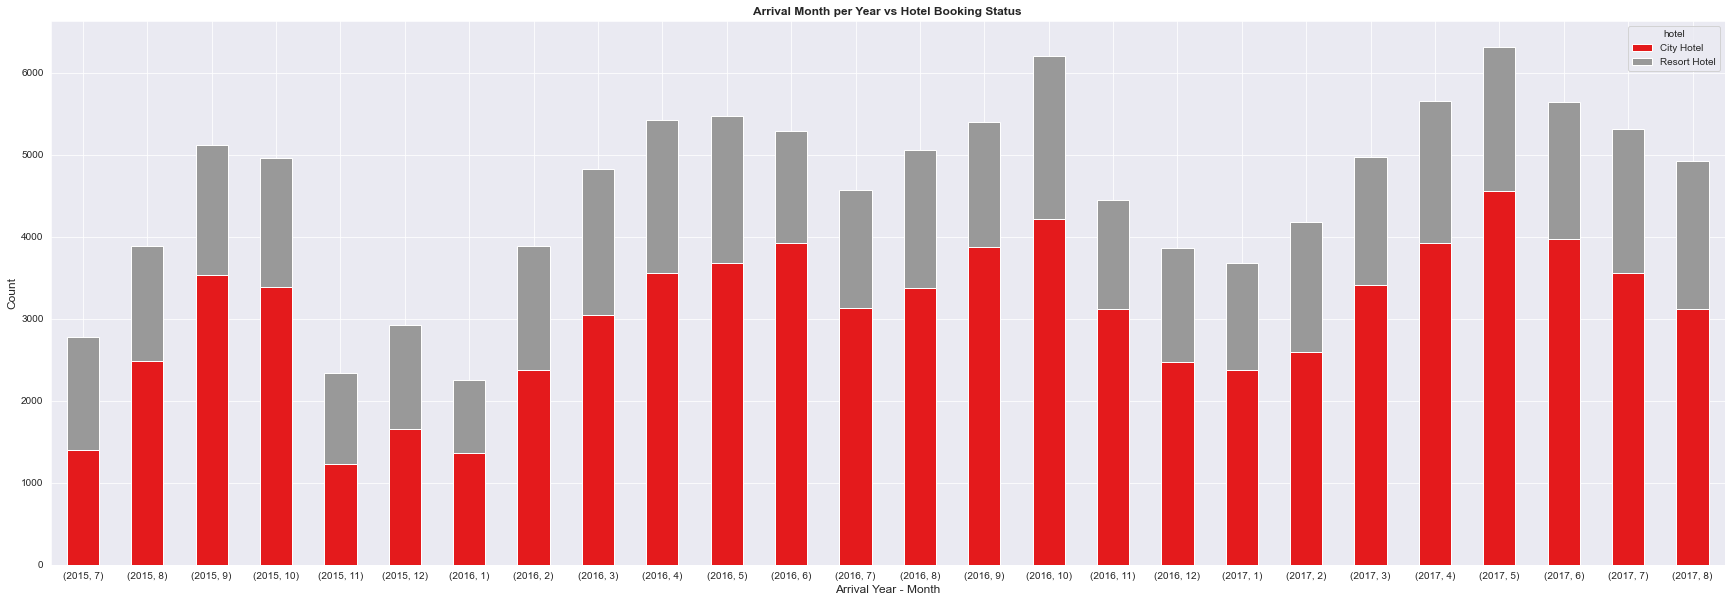

In [14]:
data['arrival_date_month']= data['arrival_date_month'].astype('int64')
group_data = data.groupby([ 'arrival_date_year',
                           'arrival_date_month','hotel']).size().unstack(fill_value=0)
group_data.sort_values(['arrival_date_year', 'arrival_date_month'], 
                       ascending = True).plot(kind='bar',stacked=True, cmap='Set1',figsize=(30,10))
plt.title('Arrival Month per Year vs Hotel Booking Status', weight='bold')
plt.xlabel('Arrival Year - Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

### Hotel: Total Passengers of Both Hotels on Week Nights and Weekend Nights

In [15]:
# Table of `stay_in_weekend` and `stay_in_week_nights` features

pd.crosstab(index = data['stays_in_week_nights'],columns=data['stays_in_weekend_nights'], 
            margins=True, margins_name = 'Total').iloc[:10]

stays_in_weekend_nights      0     1     2    3    4  5  6  7  8  9  10  12  \
stays_in_week_nights                                                          
0                          715  4569  2361    0    0  0  0  0  0  0   0   0   
1                        16451  7326  6533    0    0  0  0  0  0  0   0   0   
2                        17956  8979  6749    0    0  0  0  0  0  0   0   0   
3                        11564  6152  4542    0    0  0  0  0  0  0   0   0   
4                         4482  2412  2669    0    0  0  0  0  0  0   0   0   
5                          830  1188  8655  310   94  0  0  0  0  0   0   0   
6                            0     0   851  301  347  0  0  0  0  0   0   0   
7                            0     0   446  399  184  0  0  0  0  0   0   0   
8                            0     0   393  131  132  0  0  0  0  0   0   0   
9                            0     0    81   63   87  0  0  0  0  0   0   0   

stays_in_weekend_nights  13  14  16  18  19  Total  
stays_in_week_nights                                
0                         0   0   0   0   0   7645  
1                         0   0   0   0   0  30310  
2                         0   0   0   0   0  33684  
3                         0   0   0   0   0  22258  
4                         0   0   0   0   0   9563  
5                         0   0   0   0   0  11077  
6                         0   0   0   0   0   1499  
7                         0   0   0   0   0   1029  
8                         0   0   0   0   0    656  
9                         0   0   0   0   0    231

In [16]:
## Creating new feature: `Weekday vs Weekend` 

pd.options.mode.chained_assignment = None
def week_function(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            data['weekend_or_weekday'].iloc[i] = 'stay_just_weekend'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            data['weekend_or_weekday'].iloc[i] = 'stay_just_weekday'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            data['weekend_or_weekday'].iloc[i] = 'stay_both_weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            data['weekend_or_weekday'].iloc[i] = 'undefined_data'

In [17]:
week_function(data['stays_in_weekend_nights'],data['stays_in_week_nights'], data)

Text(0, 0.5, 'Count')

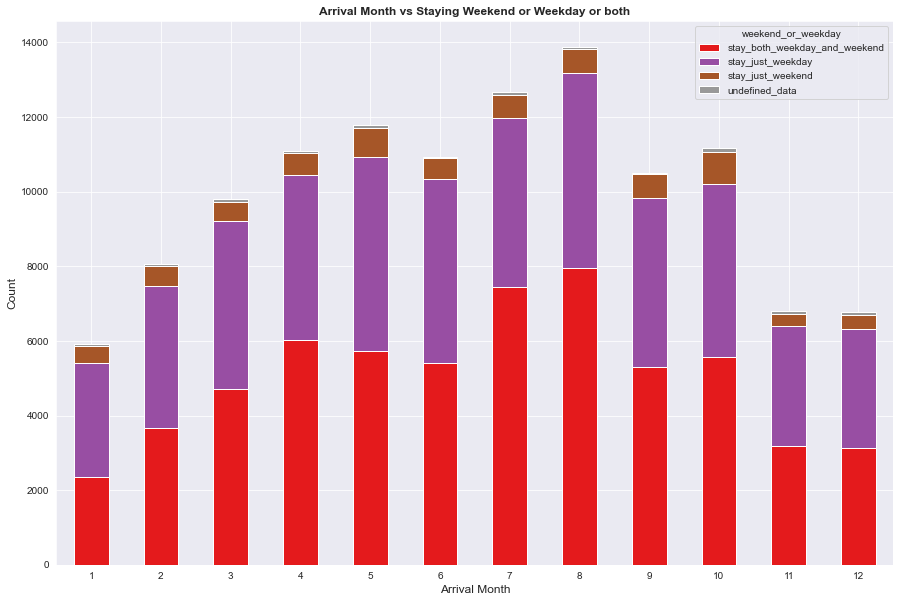

In [21]:
#`arrival_date_month` vs `weekend_or_weekday` graph 

data['arrival_date_month']= data['arrival_date_month'].astype('int64')
group_data = data.groupby([ 'arrival_date_month','weekend_or_weekday']).size().unstack(fill_value=0)
group_data.sort_values('arrival_date_month', ascending = True).plot(kind='bar',stacked=True, 
                                                                    cmap='Set1',figsize=(15,10))
plt.title('Arrival Month vs Staying Weekend or Weekday or both', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

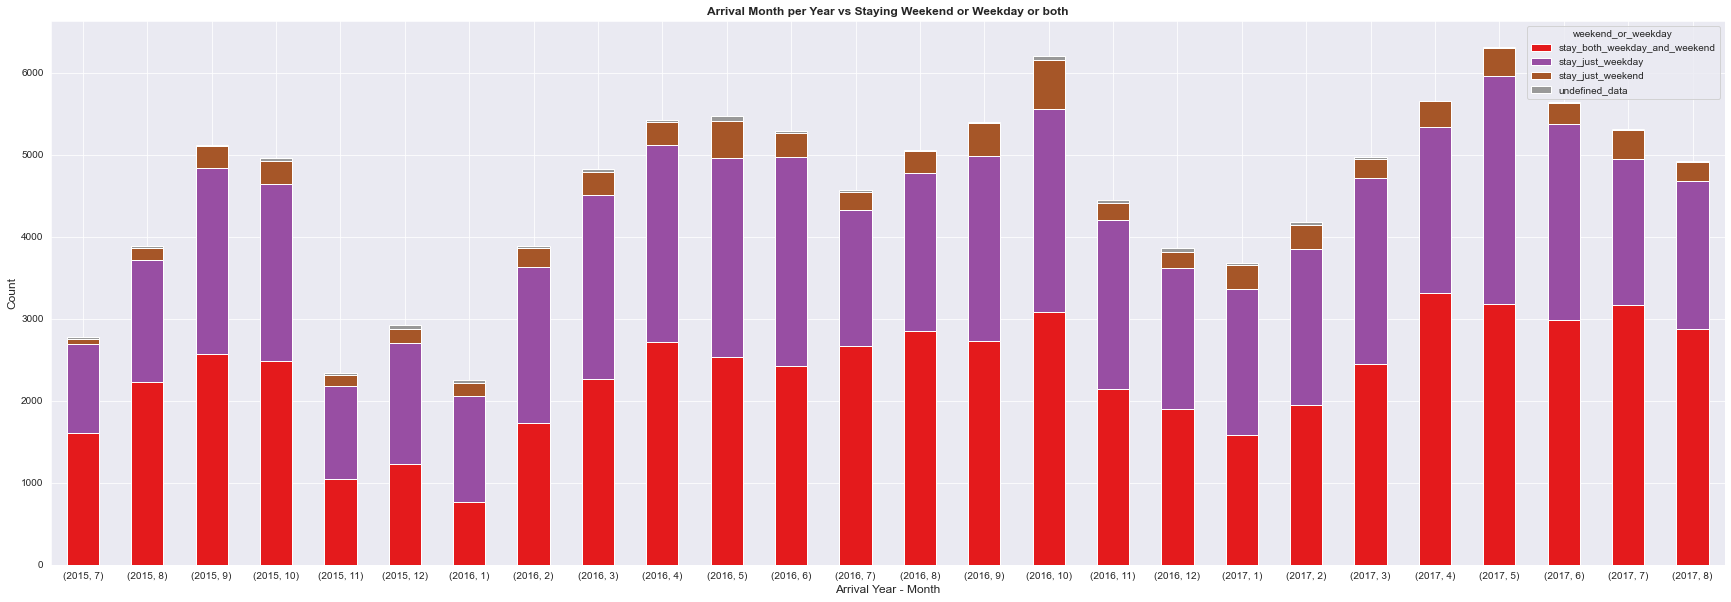

In [22]:
#'Arrival Month vs Hotel Booking Status

data['arrival_date_month']= data['arrival_date_month'].astype('int64')
group_data = data.groupby([ 'arrival_date_year','arrival_date_month','weekend_or_weekday']).size().unstack(fill_value=0)
group_data.sort_values(['arrival_date_year', 'arrival_date_month'], ascending = True).plot(kind='bar',stacked=True, 
                                                                    cmap='Set1',figsize=(30,10))
plt.title('Arrival Month per Year vs Staying Weekend or Weekday or both', weight='bold')
plt.xlabel('Arrival Year - Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

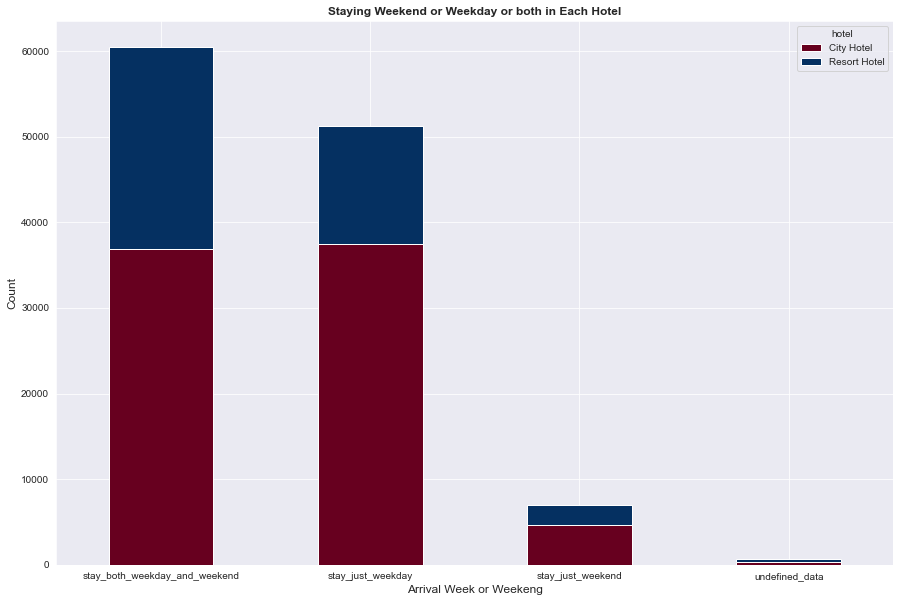

In [23]:
# Hotel vs week_weekend graph

group_data = data.groupby(['weekend_or_weekday', 'hotel']).size().unstack(fill_value=0)
group_data.sort_values('weekend_or_weekday', ascending = True).plot(kind='bar',stacked=True, 
                                                                    cmap='RdBu',figsize=(15,10))
plt.title('Staying Weekend or Weekday or both in Each Hotel', weight='bold')
plt.xlabel('Arrival Week or Weekeng', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

## Cancellation
### Cancelation: Distribution of Lead-Time based on Cancellation

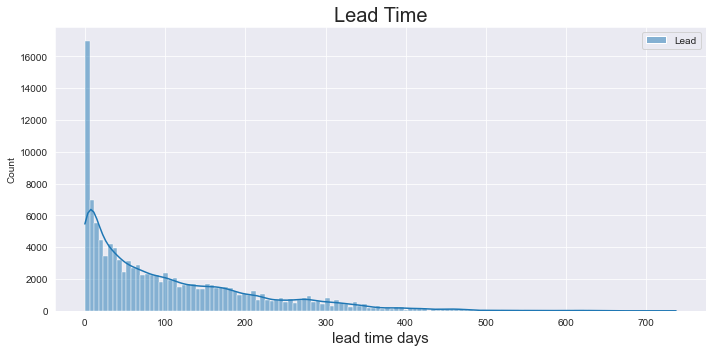

In [24]:
# shows the distribution and highest concentration points
plt.figure(figsize=(10,5))
lead_time = data['lead_time']
lead_time = pd.DataFrame(sorted(lead_time, reverse = True), columns = ['Lead'])
sns.histplot(lead_time, kde=True)
plt.title("Lead Time", size=20)
plt.xlabel("lead time days", size=15)
plt.tight_layout()
plt.show()

In [25]:
# divides lead time by less than 100 days, 100-355 days and 365 or more days
lead_time_1 = data[data["lead_time"] < 100]
lead_time_2 = data[(data["lead_time"] >= 100) & (data["lead_time"] < 365)]
lead_time_3 = data[data["lead_time"] >= 365]

In [26]:
# calculates cancellations according to lead time groups
lead_cancel_1 = lead_time_1["is_canceled"].value_counts()
lead_cancel_2 = lead_time_2["is_canceled"].value_counts()
lead_cancel_3 = lead_time_3["is_canceled"].value_counts()

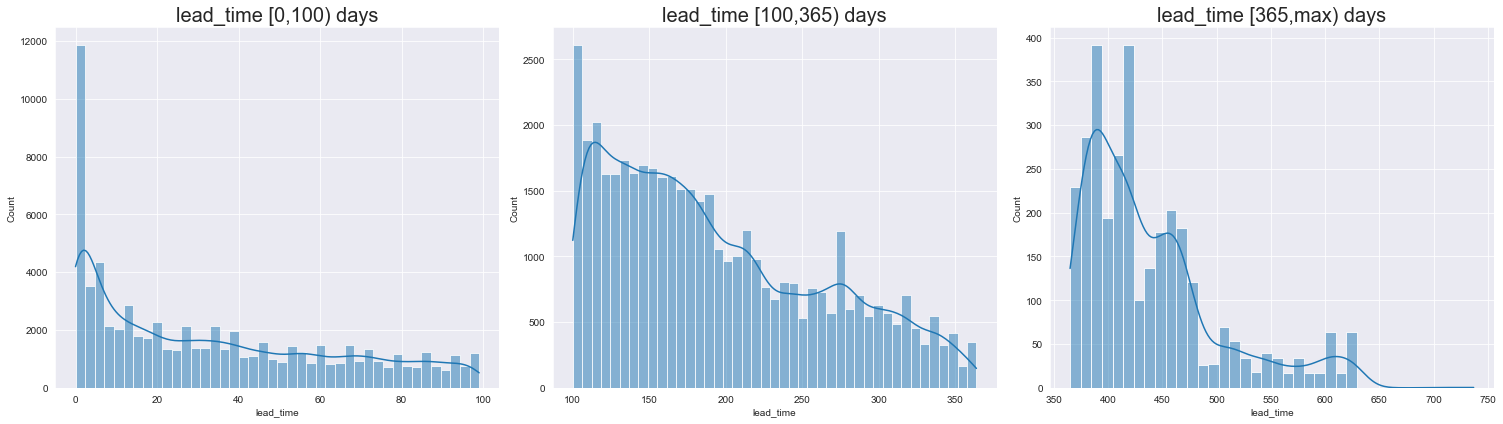

In [27]:
# makes hist plot for each lead time group
fig, (bx1, bx2, bx3) = plt.subplots(1,3,figsize=(21,6))
sns.histplot(lead_time_1["lead_time"], ax = bx1, kde=True)
bx1.set_title("lead_time [0,100) days", size=20)
sns.histplot(lead_time_2["lead_time"], ax = bx2, kde=True)
bx2.set_title("lead_time [100,365) days", size=20)
sns.histplot(lead_time_3["lead_time"], ax = bx3, kde=True)
bx3.set_title("lead_time [365,max) days", size=20)
plt.tight_layout()
plt.show()

In [28]:
# total count of lead time according to cancellation
total_lead_days_cancel = pd.DataFrame(data=[lead_cancel_1,lead_cancel_2,lead_cancel_3],
             index=["[0,100) days", "[100,365) days", "[365,max) days"])
total_lead_days_cancel

not canceled  canceled
[0,100) days           51835     19848
[100,365) days         22302     22192
[365,max) days          1029      2184

__From this data display, we know that cancellations are more likely to occur with lead times of more than 360 days.__

### Cancelation: Number of Cancellations per Year

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Total passengers of both hotels per year based on the cancellation status')]

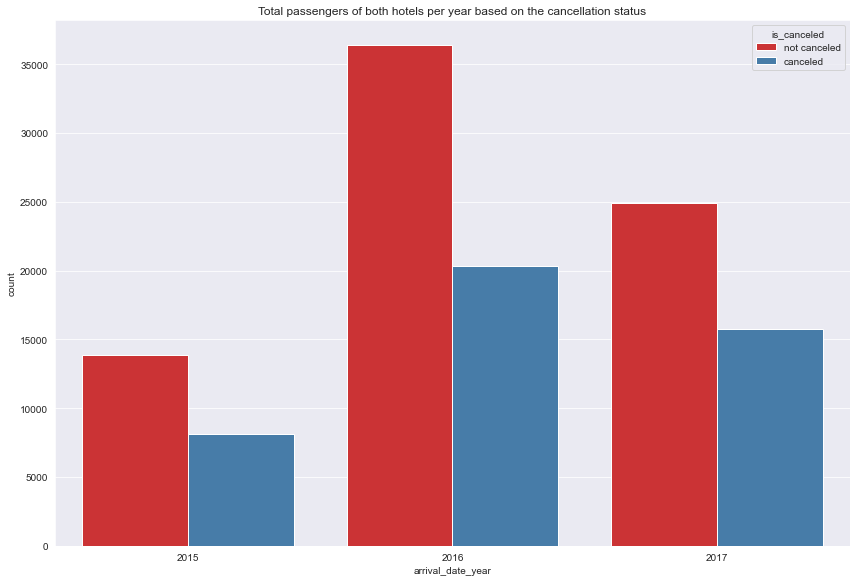

In [30]:
plt.figure(figsize=(12,8))

#1: canceled and 0: not canceled
#data['is_canceled'].replace({1: 'canceled', 0: 'not canceled'}, inplace = True)

# Plot
dist = sns.countplot(data['arrival_date_year'], hue = 'is_canceled', data = data, palette = 'Set1');
plt.tight_layout()
dist.set(title = "Total passengers of both hotels per year based on the cancellation status")

### Cancelation: Number of Cancellations per Month

Text(0, 0.5, 'Count')

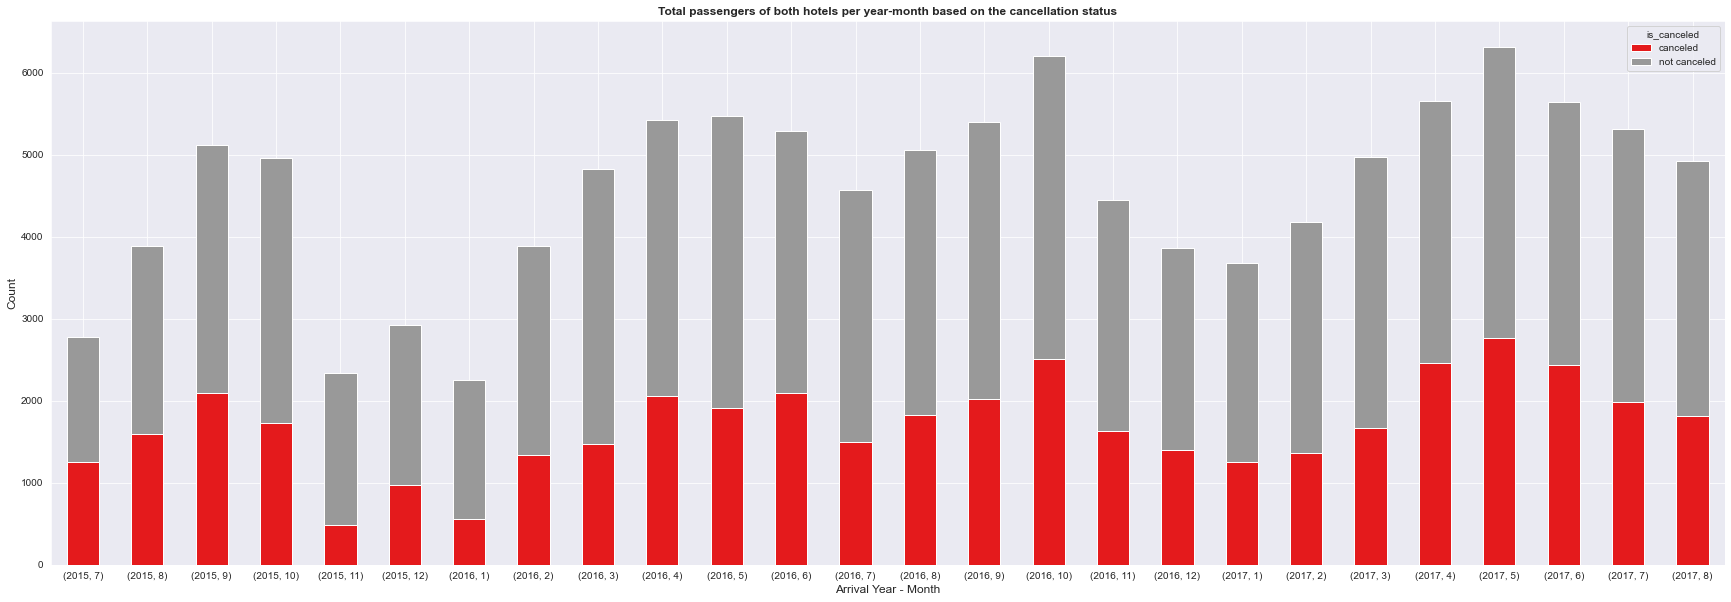

In [32]:
data['arrival_date_month']= data['arrival_date_month'].astype('int64')
group_data = data.groupby([ 'arrival_date_year','arrival_date_month','is_canceled']).size().unstack(fill_value=0)
group_data.sort_values(['arrival_date_year', 'arrival_date_month'], ascending = True).plot(kind='bar',stacked=True, 
                                                                    cmap='Set1',figsize=(30,10))
plt.title('Total passengers of both hotels per year-month based on the cancellation status', 
          weight='bold')
plt.xlabel('Arrival Year - Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

### Cancelation: Number of Cancellations per Week Nights/Weekend Nights

Text(0, 0.5, 'Count')

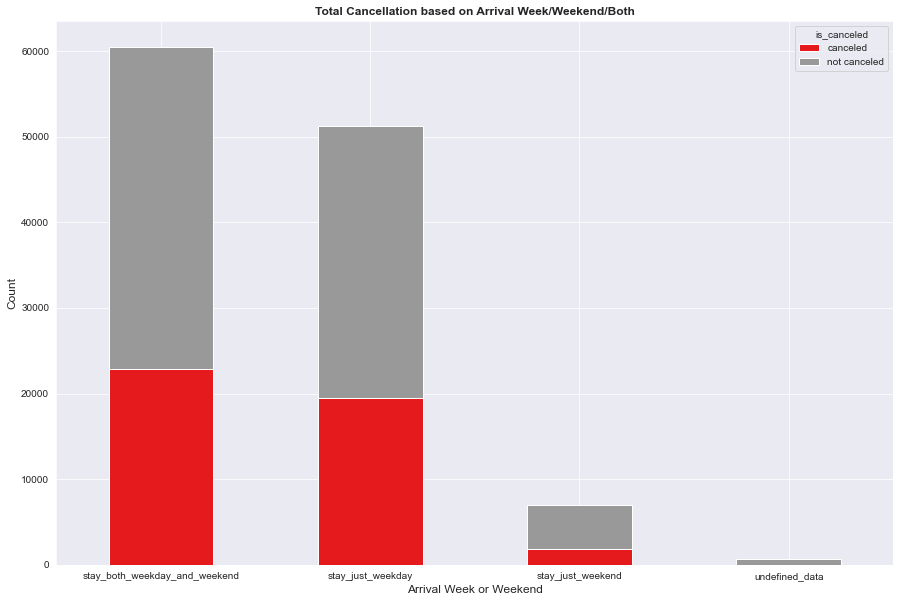

In [34]:
group_data = data.groupby(['weekend_or_weekday', 'is_canceled']).size().unstack(fill_value=0)
group_data.sort_values('weekend_or_weekday', 
                       ascending = True).plot(kind='bar',stacked=True, cmap='Set1',figsize=(15,10))
plt.title('Total Cancellation based on Arrival Week/Weekend/Both', weight='bold')
plt.xlabel('Arrival Week or Weekend', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

### Cancelation: Number of Cancellations based on Market_segment, Distribution Channel, Reserved_Room_Type, and Customer_Type

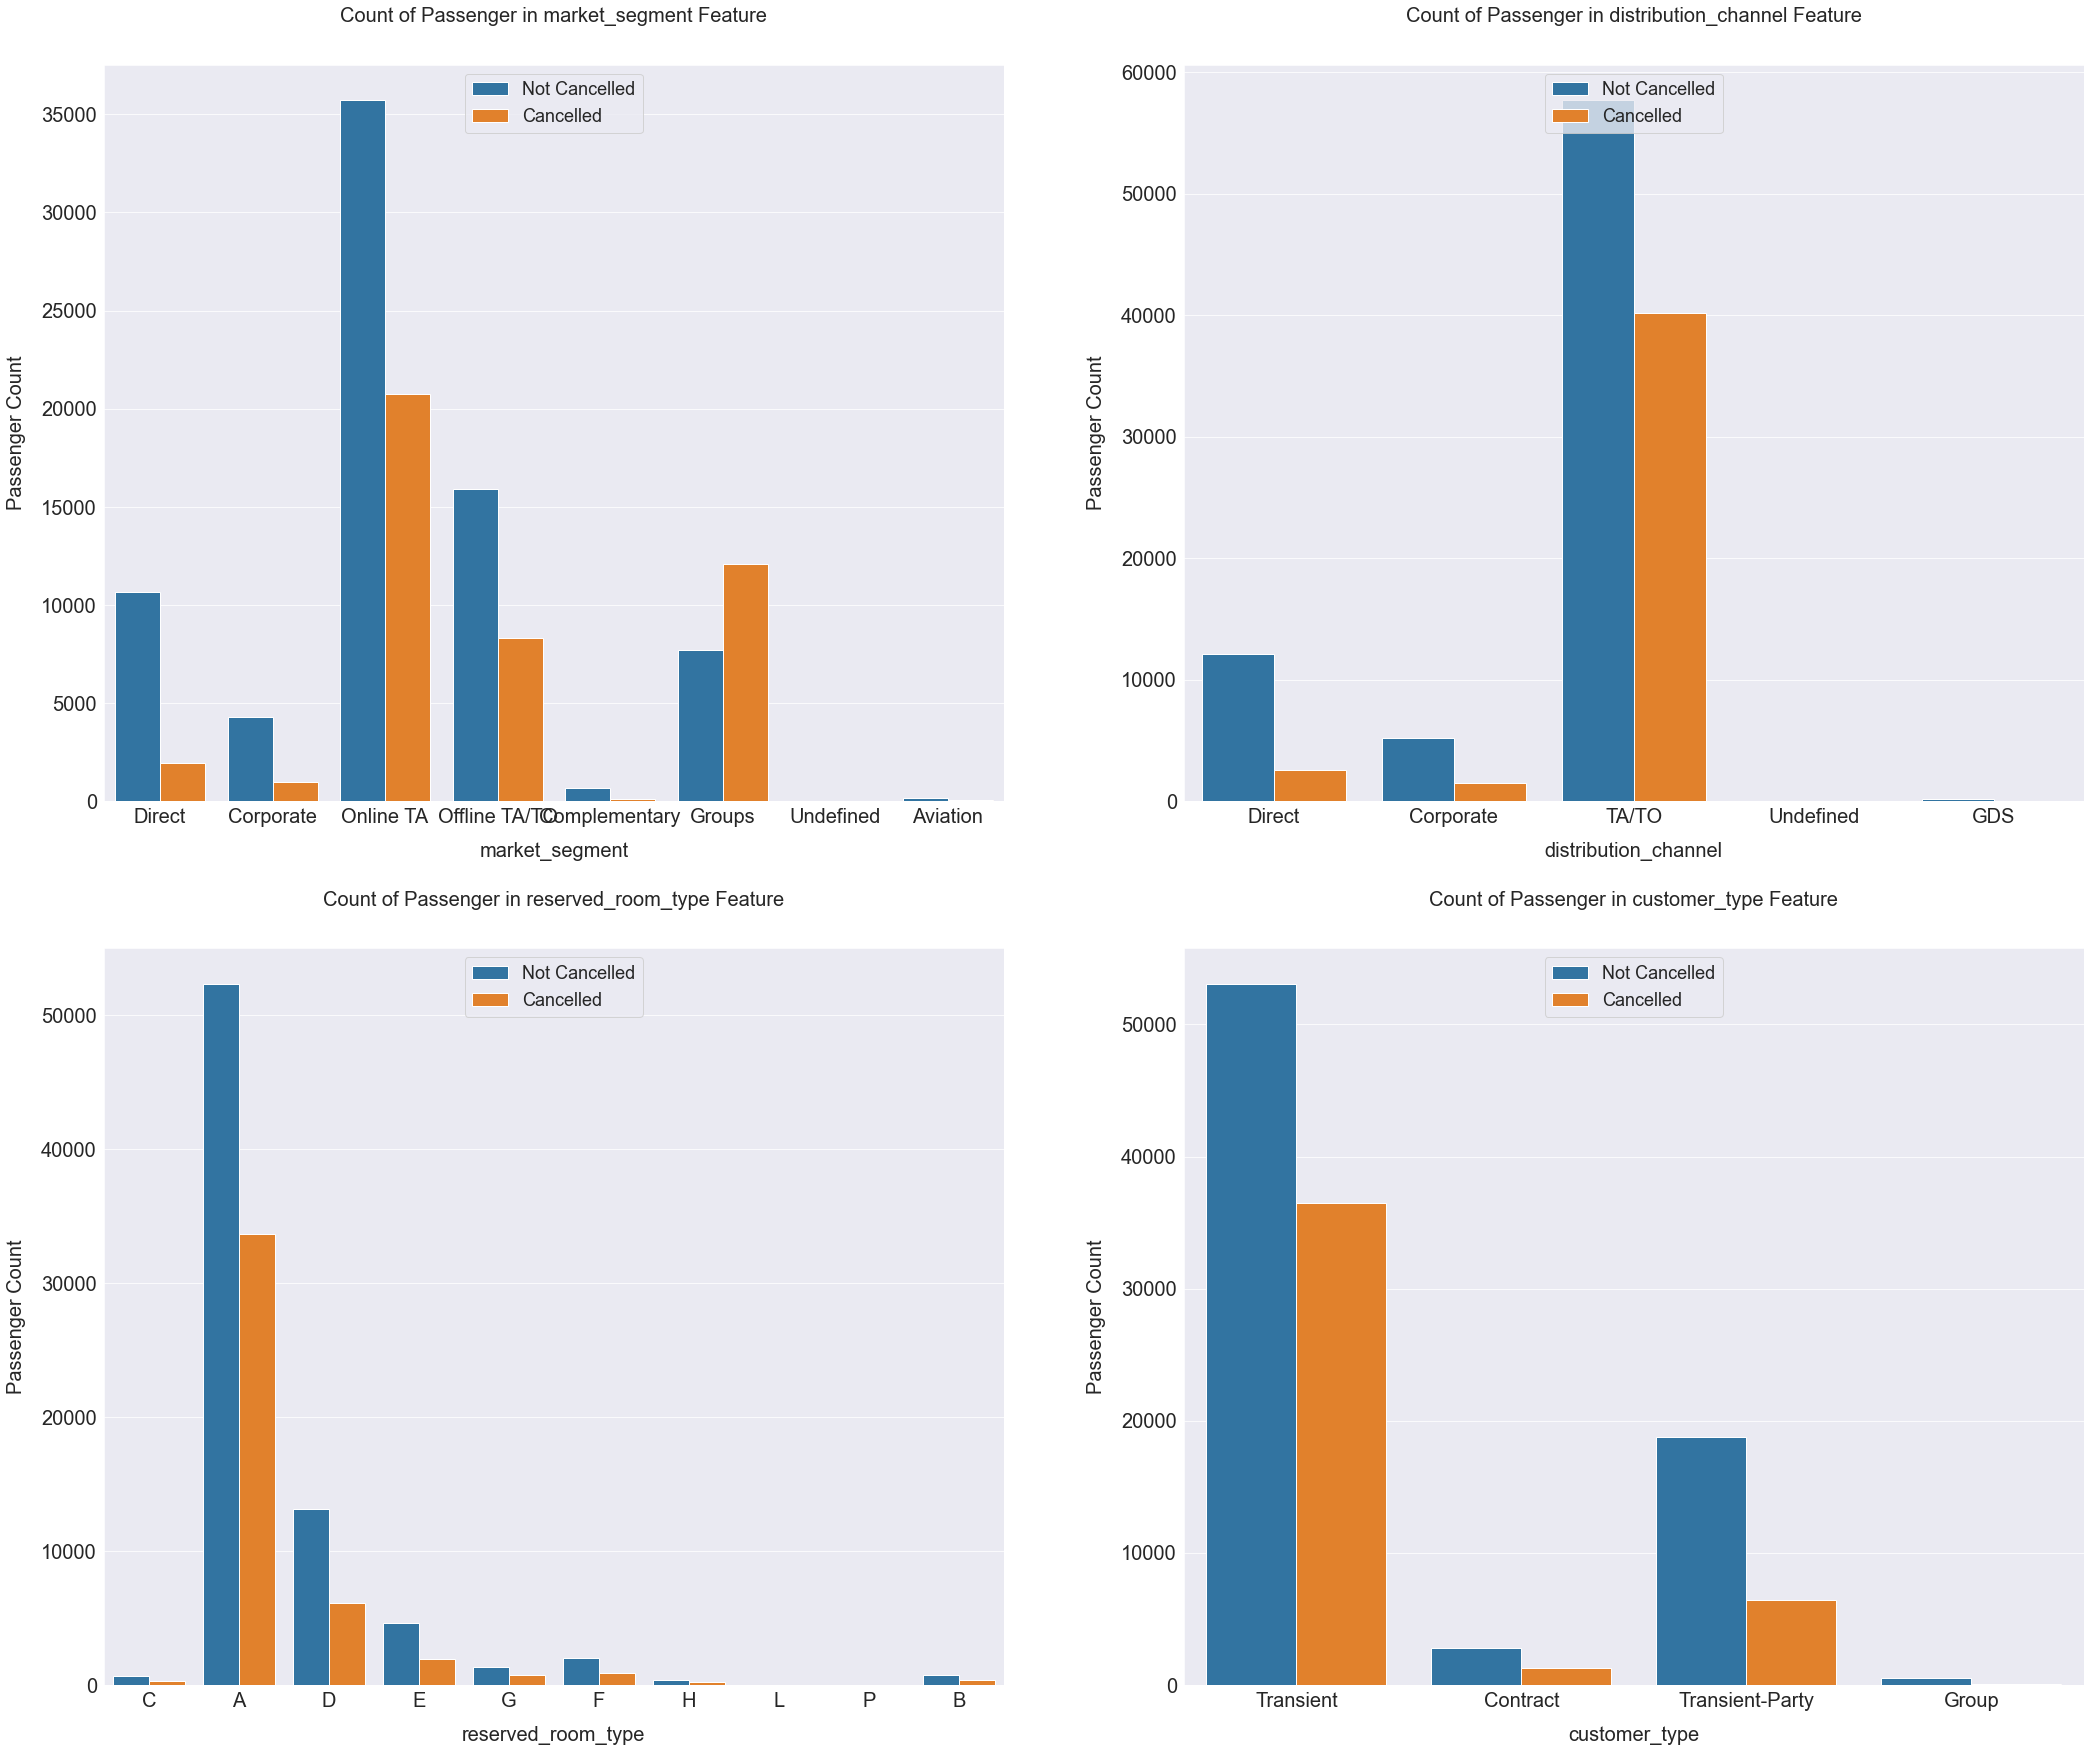

In [35]:
cat_features = ['market_segment', 'distribution_channel', 'reserved_room_type', 'customer_type']

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='is_canceled', data=data)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Cancelled', 'Cancelled'], loc='upper center', prop={'size': 18})
    plt.title('Count of Passenger in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

### Cancelation: Number of Cancellations based on Country

In [36]:
data.country.value_counts(normalize=True)

PRT    0.410353
GBR    0.101834
FRA    0.087260
ESP    0.071815
DEU    0.061069
ITA    0.031594
IRL    0.028378
BEL    0.019658
BRA    0.018636
NLD    0.017623
USA    0.017564
CHE    0.014490
CN     0.010713
AUT    0.010579
SWE    0.008577
CHN    0.008368
POL    0.007706
ISR    0.005603
RUS    0.005294
NOR    0.005084
ROU    0.004188
FIN    0.003870
DNK    0.003644
AUS    0.003568
AGO    0.003049
LUX    0.002404
MAR    0.002169
TUR    0.002077
HUN    0.001935
ARG    0.001792
JPN    0.001650
CZE    0.001432
IND    0.001273
KOR    0.001114
GRC    0.001072
DZA    0.000863
SRB    0.000846
HRV    0.000838
MEX    0.000712
IRN    0.000695
EST    0.000695
LTU    0.000678
ZAF    0.000670
BGR    0.000628
NZL    0.000620
COL    0.000595
UKR    0.000570
MOZ    0.000561
CHL    0.000544
SVK    0.000544
THA    0.000494
SVN    0.000477
ISL    0.000477
LVA    0.000461
ARE    0.000427
CYP    0.000427
TWN    0.000427
SAU    0.000402
PHL    0.000335
TUN    0.000327
SGP    0.000327
IDN    0.000293
NGA    0

Text(0, 0.5, 'Count')

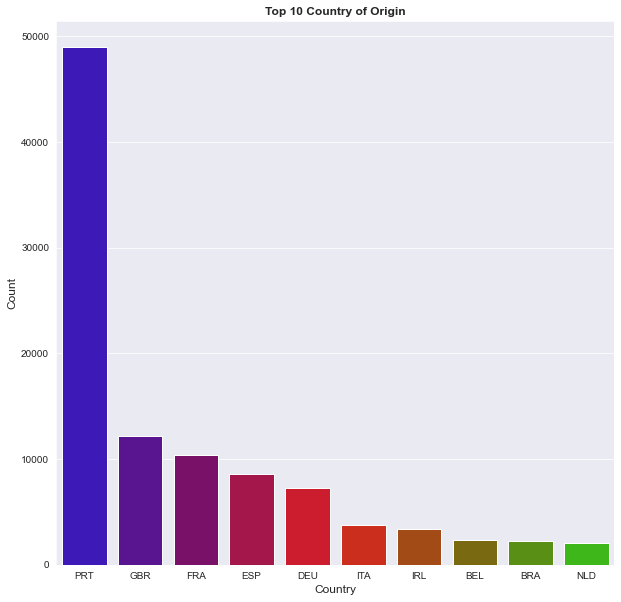

In [37]:
plt.figure(figsize=(10,10))
sns.countplot(x='country', data=data, 
              order=pd.value_counts(data['country']).iloc[:10].index, palette="brg")
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [38]:
import plotly.express as px
#import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import plotly.offline as pyo

data['is_canceled'].replace({'canceled': 1 , 'not canceled':0}, inplace = True)
country_visitors = data[data['is_canceled'] == 0].groupby(['country']).size().reset_index(name = 'count')

# Set notebook mode to work in offline
pyo.init_notebook_mode()

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count" ,
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale="Viridis",
                    title="Home country of visitors")

In [39]:
country_visitors = data[data['is_canceled'] == 1].groupby(['country']).size().reset_index(name = 'count')

# Set notebook mode to work in offline
pyo.init_notebook_mode()

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count" ,
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale="Viridis",
                    title="Home country of visitors that cancelled")

__Based on this map, we know that the most visitors who cancel the most are from Portugal.__

### Cancelation: Number of Cancellations based on Meal Booked

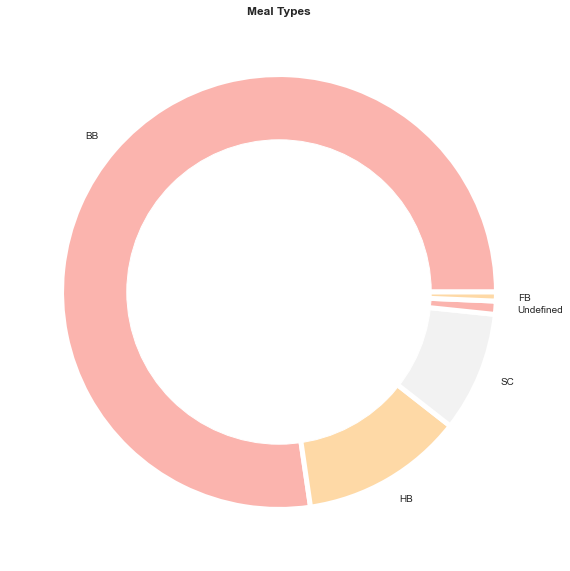

In [40]:
meal_labels= ['BB','HB', 'SC', 'Undefined', 'FB']
size = data['meal'].value_counts()
plt.figure(figsize=(10,10))
cmap =plt.get_cmap("Pastel1")
colors = cmap(np.arange(3)*4)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=meal_labels, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Meal Types', weight='bold')
plt.show()

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Cancellation based on Meal Booked')]

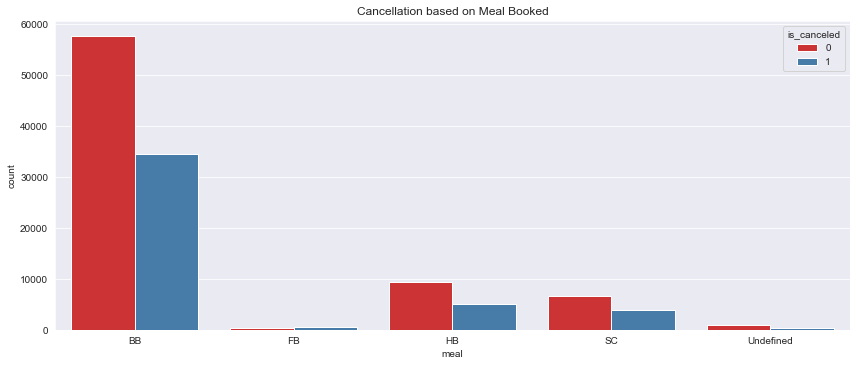

In [42]:
# Parameters
plt.figure(figsize=(12,5))

# Plot
dist = sns.countplot(data['meal'], hue = 'is_canceled', data = data, palette = 'Set1');
plt.tight_layout()
dist.set(title = "Cancellation based on Meal Booked")

### Cancelation: Number of Cancellations based on Adult, Children, and Babies
#### Cancellations vs Adult, Children, and Babies

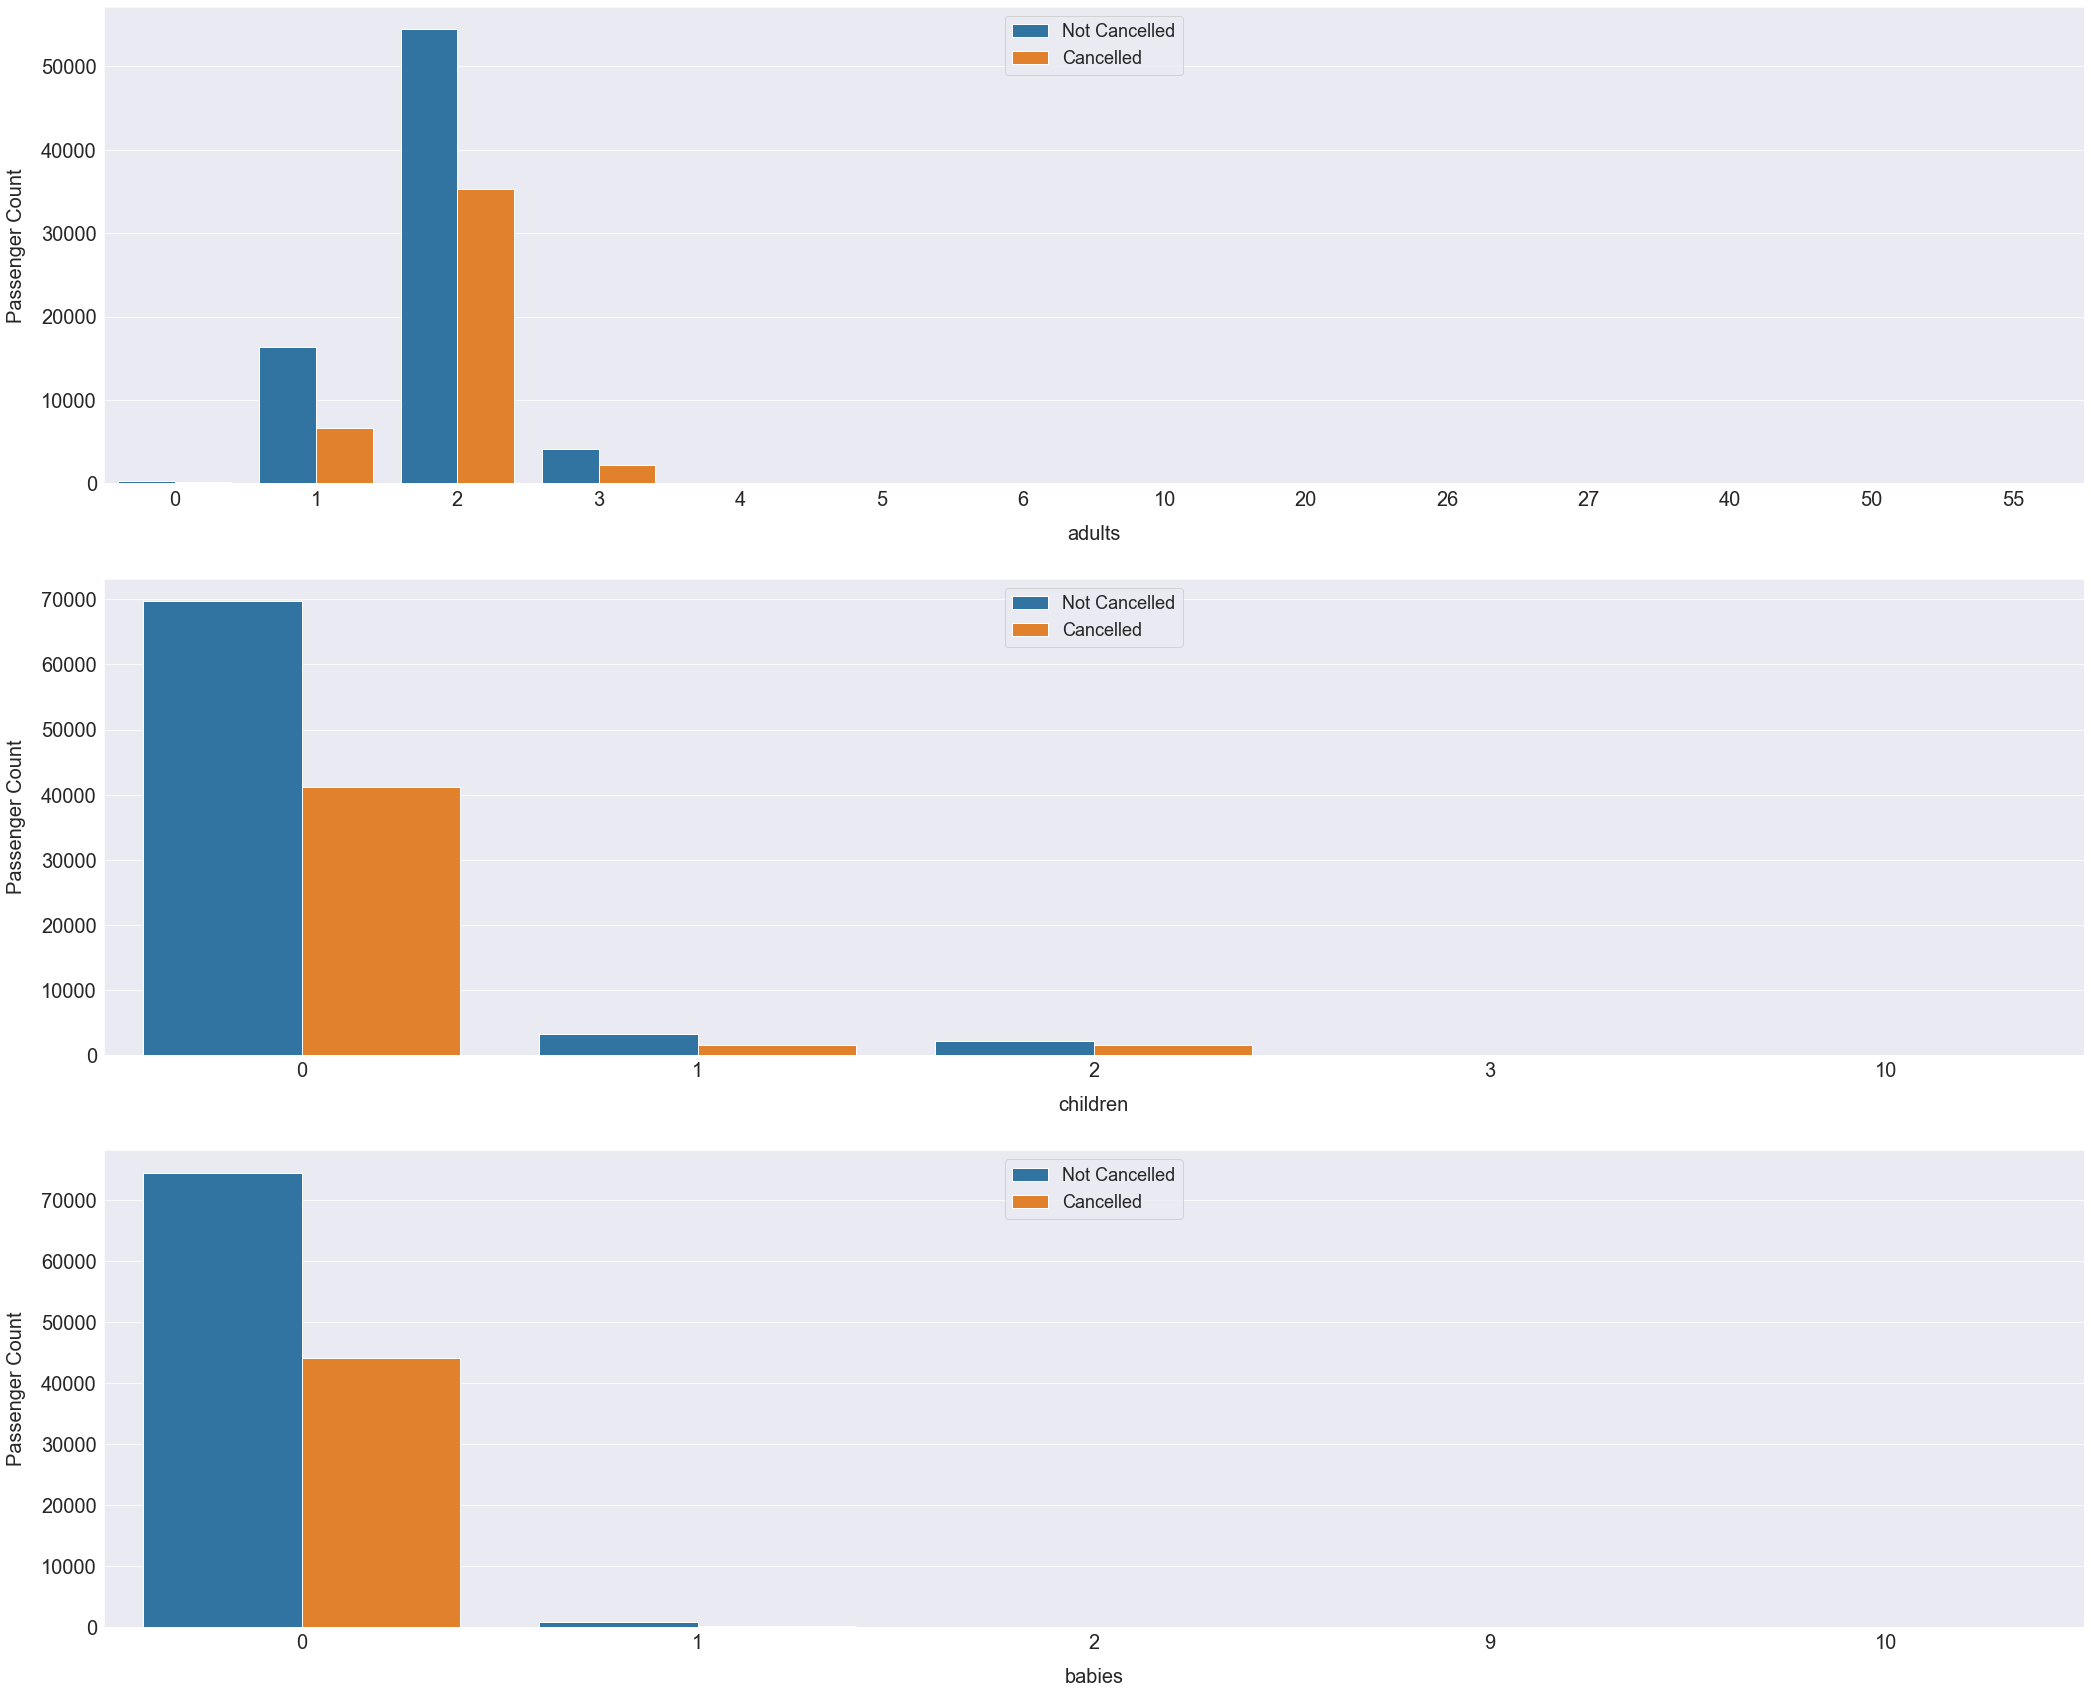

In [43]:
fam_features = ['adults', 'children', 'babies']

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(fam_features, 1):    
    plt.subplot(3, 1, i)
    sns.countplot(x=feature, hue='is_canceled', data=data)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Cancelled', 'Cancelled'], loc='upper center', prop={'size': 18})
    #plt.title('Count of Passenger in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

#### Cancelation vs Children+Babies

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Distribution of the meal based on the booking status')]

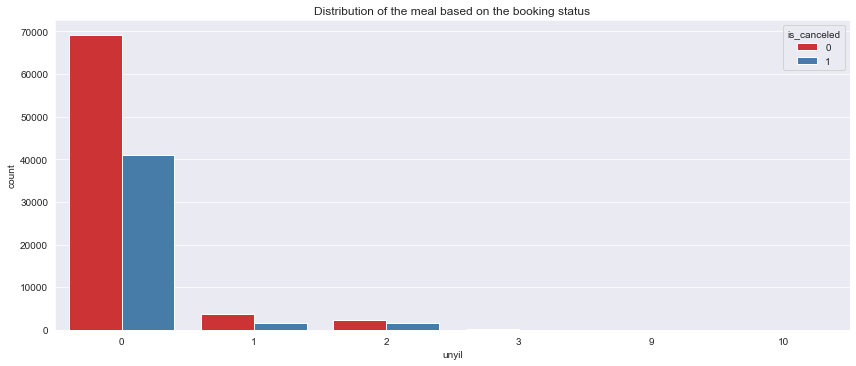

In [44]:
# we do a slightly feature engineering

data["unyil"] = data['children'] + data['babies']

plt.figure(figsize=(12,5))

# Plot
dist = sns.countplot(data['unyil'], hue = 'is_canceled', data = data, palette = 'Set1');
plt.tight_layout()
dist.set(title = "Distribution of the meal based on the booking status")

In [45]:
pd.crosstab(index = data['adults'],columns=data['children'], 
            margins=True, margins_name = 'Total').iloc[:10]

children      0     1     2   3  10  Total
adults                                    
0           180     4   208  11   0    403
1         22587   279   157   4   0  23027
2         82281  4089  3248  61   1  89680
3          5676   487    39   0   0   6202
4            60     2     0   0   0     62
5             2     0     0   0   0      2
6             1     0     0   0   0      1
10            1     0     0   0   0      1
20            2     0     0   0   0      2
26            5     0     0   0   0      5

#### Cancelation vs Adult-Children-Babies

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Distribution of the meal based on the booking status')]

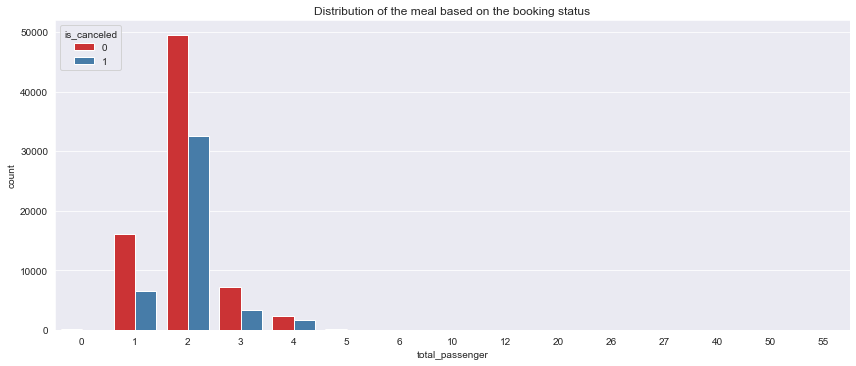

In [47]:
#feature engineering
# we assume that total passengers are a combination of adults, children, and babies.
data["total_passenger"] = data['adults'] + data['children'] + data['babies']

plt.figure(figsize=(12,5))

# Plot
dist = sns.countplot(data['total_passenger'], hue = 'is_canceled', data = data, palette = 'Set1');
plt.tight_layout()
dist.set(title = "Distribution of the meal based on the booking status")

### Cancelation: Number of Cancellations based on required_car_parking_spaces        

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Cancellation based on the required car parking spaces')]

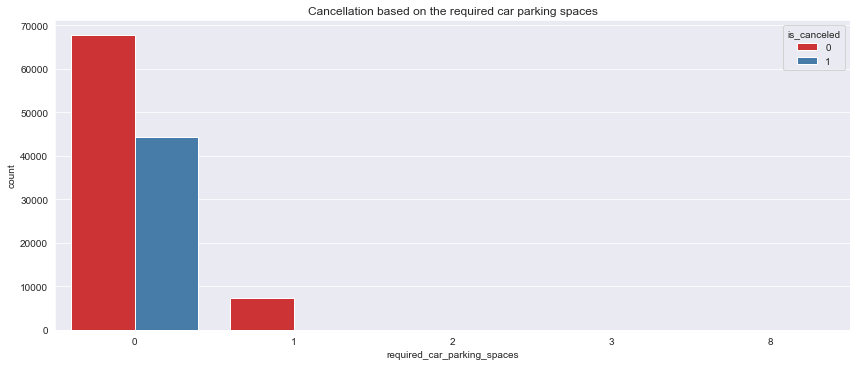

In [49]:
# Parameters
plt.figure(figsize=(12,5))

# Plot
dist = sns.countplot(data['required_car_parking_spaces'], hue = 'is_canceled', data = data, palette = 'Set1');
plt.tight_layout()
dist.set(title = "Cancellation based on the required car parking spaces")

### Cancelation: Number of Cancellations based on ADR

Text(0, 0.5, 'ADR')

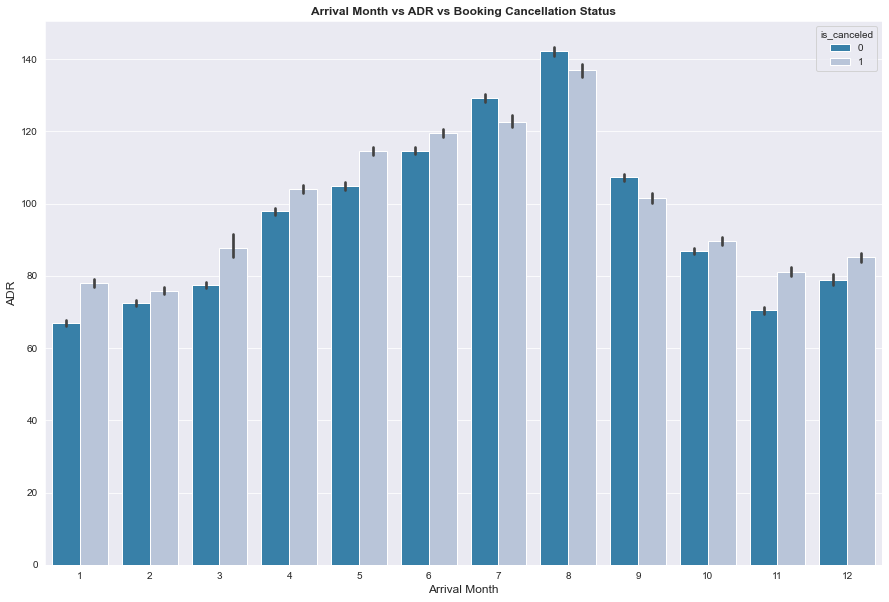

In [50]:
data['adr'] = data['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette= 'PuBu_r', data=data)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

### Cancelation: Number of Cancellations based on Deposit

In [51]:
deposit_mean_data = data.groupby("deposit_type").mean()
deposit_mean_data

is_canceled   lead_time  arrival_date_year  arrival_date_month  \
deposit_type                                                                   
No Deposit       0.283770   88.756615        2016.174014            6.545044   
Non Refund       0.993624  212.908891        2016.031466            6.624940   
Refundable       0.222222  152.098765        2016.141975            4.833333   

              arrival_date_week_number  arrival_date_day_of_month  \
deposit_type                                                        
No Deposit                   27.135310                  15.814652   
Non Refund                   27.448619                  15.595462   
Refundable                   20.932099                  23.456790   

              stays_in_weekend_nights  stays_in_week_nights    adults  \
deposit_type                                                            
No Deposit                   0.970165              2.556799  1.862597   
Non Refund                   0.621718              2.091109  1.811407   
Refundable                   0.975309              2.851852  1.907407   

              children    babies  is_repeated_guest  previous_cancellations  \
deposit_type                                                                  
No Deposit    0.118395  0.009069           0.035760                0.042039   
Non Refund    0.000617  0.000000           0.004387                0.411462   
Refundable    0.030864  0.000000           0.024691                0.000000   

              previous_bookings_not_canceled  booking_changes  \
deposit_type                                                    
No Deposit                          0.154911         0.249634   
Non Refund                          0.010626         0.012477   
Refundable                          0.018519         0.592593   

              days_in_waiting_list         adr  required_car_parking_spaces  \
deposit_type                                                                  
No Deposit                1.519347  103.525067                     0.071129   
Non Refund                7.992253   89.964017                     0.000069   
Refundable                9.586420   76.209753                     0.123457   

              total_of_special_requests     unyil  total_passenger  
deposit_type                                                        
No Deposit                     0.651427  0.127464         1.990061  
Non Refund                     0.001782  0.000617         1.812024  
Refundable                     0.141975  0.030864         1.938272

### Cancelation: Number of Cancellations based on Previous Cancellations

In [52]:
# sort the index values
data['previous_cancellations'].value_counts().sort_index()

0     112906
1       6051
2        116
3         65
4         31
5         19
6         22
11        35
13        12
14        14
19        19
21         1
24        48
25        25
26        26
Name: previous_cancellations, dtype: int64

In [53]:
print("Cancellation Rates:\n")
print('Never canceled =' ,str(round(data[data['previous_cancellations']==0]
                                            ['is_canceled'].mean()*100,2))+' %')
print('Canceled once =' ,str(round(data[data['previous_cancellations']==1]
                                            ['is_canceled'].mean()*100,2))+' %')
print('Canceled more than 10 times:',str(round(data[data['previous_cancellations']>10]
                                            ['is_canceled'].mean()*100,2))+' %')
print('Canceled more than 11 times:' ,str(round(data[data['previous_cancellations']>11]
                                            ['is_canceled'].mean()*100,2))+' %')

Cancellation Rates:

Never canceled = 33.91 %
Canceled once = 94.43 %
Canceled more than 10 times: 85.56 %
Canceled more than 11 times: 99.31 %


### Cancelation: Number of Cancellations based on Reservation Status

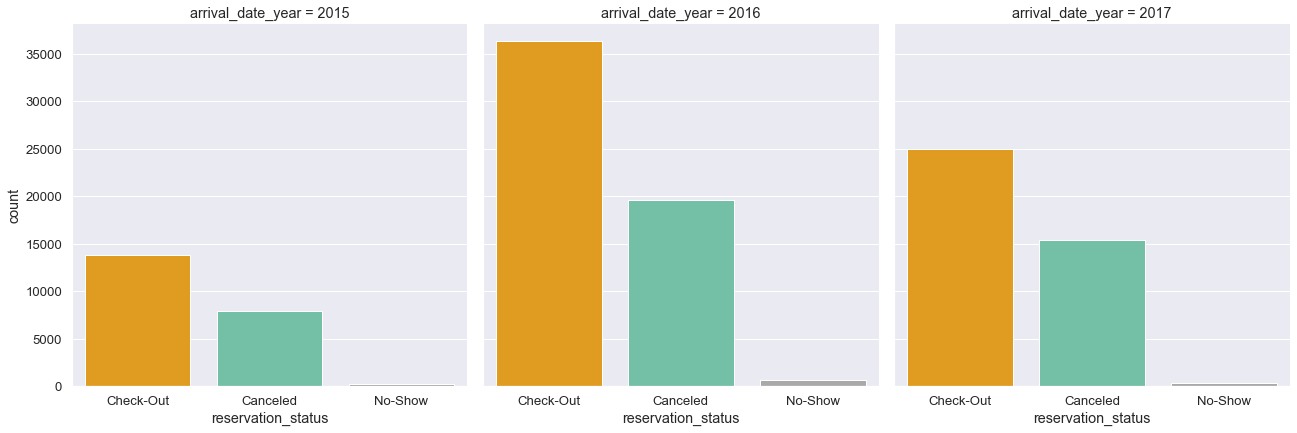

In [54]:
# Parameters
plt.rcParams['figure.figsize'] = [15, 7]
sns.set(style = 'darkgrid', font_scale = 1.2)

# catplot (countplot)
cat = sns.catplot(x = 'reservation_status', col = 'arrival_date_year', kind = 'count', data = data,
            height = 6, palette = ['orange', 'mediumaquamarine', 'darkgrey']);

### Cancelation: Number of Cancellations based on with/without special requests

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



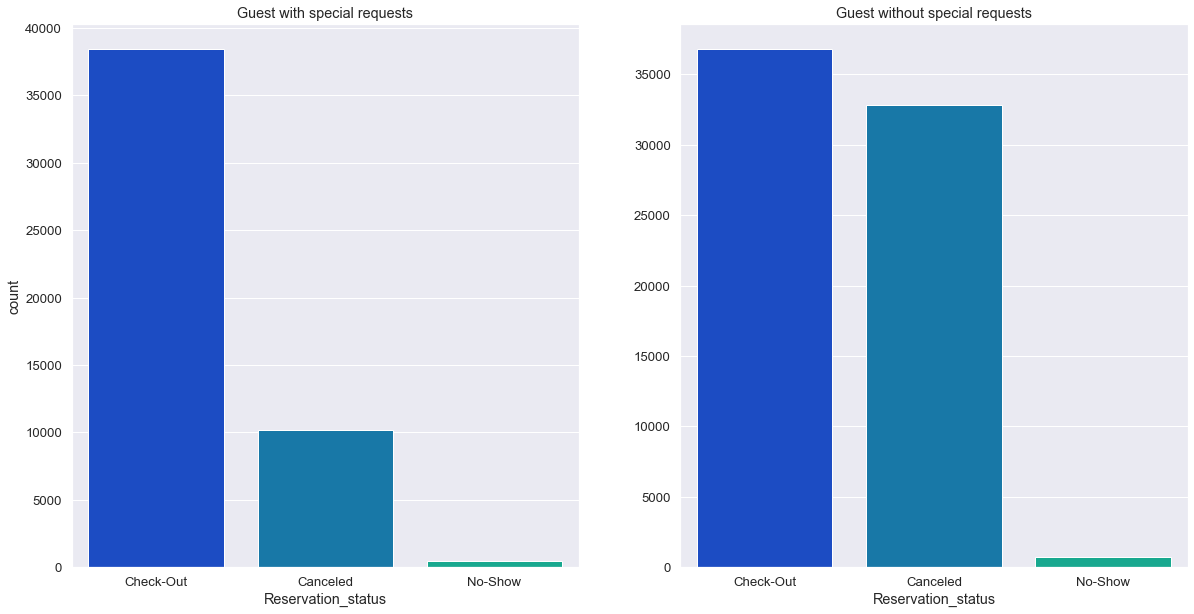

In [55]:
# Parameters
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots(1, 2)
sns.set(style = 'darkgrid', font_scale = 1.2)

# Special and non Special Request of the guest
special_req = data[data.total_of_special_requests != 0].copy()
non_special_req = data[data.total_of_special_requests == 0].copy()

# Plots
spec = sns.countplot(special_req.reservation_status, ax = ax[0], palette = 'winter')
spec.set(title = 'Guest with special requests', xlabel = 'Reservation_status')

n_spec = sns.countplot(non_special_req.reservation_status, ax = ax[1], palette = 'winter')
n_spec.set(title = 'Guest without special requests', ylabel = "", xlabel = 'Reservation_status');

Text(0, 0.5, 'Count')

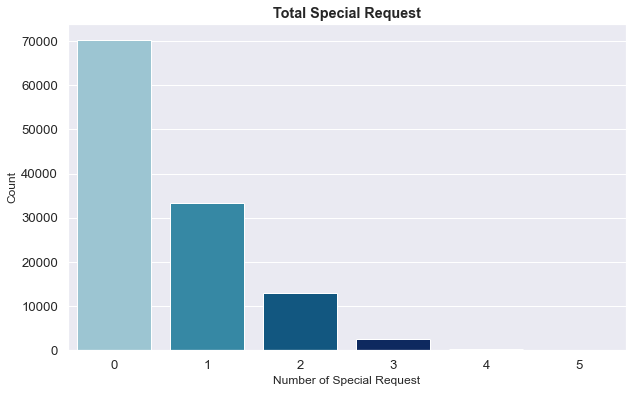

In [56]:
# `total_of_special_requests` graph

plt.figure(figsize=(10,6))
sns.countplot(x='total_of_special_requests', data=data, palette = 'ocean_r')
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

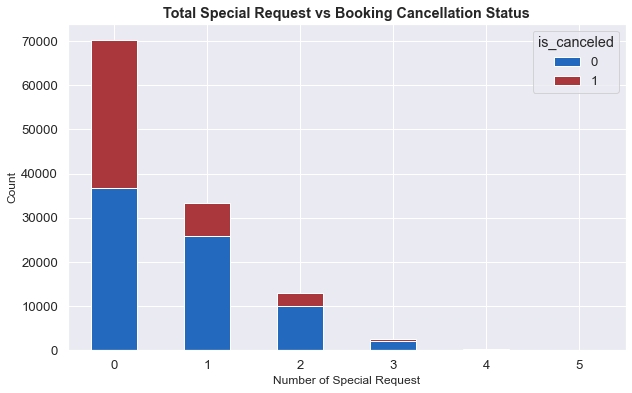

In [57]:
# Group by `total_of_special_requests` and `is_canceled` features

group_adr_request = data.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
group_adr_request.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,6))
plt.title('Total Special Request vs Booking Cancellation Status', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

### Cancelation Rate

In [58]:
# calculate the canceled percentage
total_canceled = data.is_canceled.value_counts()[1]
print(f' Booking is canceled: {total_canceled} passengers')
total_not_canceled = data.is_canceled.value_counts()[0]
print(f' Booking is not canceled: {total_not_canceled} passengers')
cancelation_rate = total_canceled / (total_canceled + total_not_canceled) *100
print(f' Cancelation rate is {cancelation_rate:.2f}%')

 Booking is canceled: 44224 passengers
 Booking is not canceled: 75166 passengers
 Cancelation rate is 37.04%


In [59]:
## Retrieve customers that canceled their reservation
## Save it to new dataframe canceled_table
canceled_table = data[data.is_canceled == 1]
## Count canceled bookings for both hotels
canceled_table.hotel.value_counts()

City Hotel      33102
Resort Hotel    11122
Name: hotel, dtype: int64

In [60]:
## See total number of bookings for each lead_time 
lead_time_count = data.groupby('lead_time')['is_canceled'].count()
lead_time_count

lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
5      1565
6      1445
7      1331
8      1138
9       992
10      976
11     1055
12     1079
13      821
14      965
15      839
16      942
17      881
18      826
19      839
20      750
21      678
22      707
23      643
24      665
25      653
26      671
27      649
28      820
29      712
30      659
31      685
32      690
33      643
34      828
35      655
36      663
37      673
38      575
39      673
40      722
41      607
42      464
43      479
44      633
45      537
46      495
47      568
48      506
49      479
50      527
51      366
52      435
53      530
54      472
55      575
56      676
57      457
58      401
59      520
60      436
61      513
62      414
63      398
64      423
65      448
66      466
67      439
68      564
69      558
70      384
71      423
72      531
73      402
74      519
75      425
76      351
77      357
78      384
79      357
80      440
81      360
82    

In [61]:
#total number of bookings canceled for each lead time
lead_time_canceled_count = canceled_table.groupby('lead_time')['hotel'].count()
lead_time_canceled_count

lead_time
0      430
1      321
2      213
3      182
4      176
5      206
6      202
7      172
8      223
9      219
10     222
11     221
12     278
13     168
14     215
15     252
16     234
17     234
18     261
19     261
20     218
21     191
22     215
23     212
24     178
25     209
26     235
27     245
28     339
29     210
30     243
31     189
32     228
33     234
34     330
35     212
36     197
37     319
38     279
39     228
40     231
41     195
42     159
43     156
44     253
45     201
46     180
47     155
48     134
49     187
50     211
51     124
52     191
53     156
54     214
55     180
56     354
57     141
58     152
59     215
60     169
61     223
62     161
63     127
64     138
65     195
66     187
67     180
68     263
69     226
70     123
71     200
72     190
73     151
74     236
75     177
76     124
77     136
78     170
79     137
80     155
81     135
82     161
83     105
84      84
85     141
86     191
87     254
88     195
89     123


In [62]:
# calculate cancellation_rate by divide two series
cancellation_rate = lead_time_canceled_count / lead_time_count 
cancellation_rate.dropna(inplace = True)
cancellation_rate

lead_time
0      0.067770
1      0.092775
2      0.102948
3      0.100220
4      0.102624
5      0.131629
6      0.139792
7      0.129226
8      0.195958
9      0.220766
10     0.227459
11     0.209479
12     0.257646
13     0.204629
14     0.222798
15     0.300358
16     0.248408
17     0.265607
18     0.315981
19     0.311085
20     0.290667
21     0.281711
22     0.304102
23     0.329705
24     0.267669
25     0.320061
26     0.350224
27     0.377504
28     0.413415
29     0.294944
30     0.368741
31     0.275912
32     0.330435
33     0.363919
34     0.398551
35     0.323664
36     0.297134
37     0.473997
38     0.485217
39     0.338782
40     0.319945
41     0.321252
42     0.342672
43     0.325678
44     0.399684
45     0.374302
46     0.363636
47     0.272887
48     0.264822
49     0.390397
50     0.400380
51     0.338798
52     0.439080
53     0.294340
54     0.453390
55     0.313043
56     0.523669
57     0.308534
58     0.379052
59     0.413462
60     0.387615
61     0.43469

In [63]:
#save series to a data frame
cancellation_rate.to_frame()

0
lead_time          
0          0.067770
1          0.092775
2          0.102948
3          0.100220
4          0.102624
5          0.131629
6          0.139792
7          0.129226
8          0.195958
9          0.220766
10         0.227459
11         0.209479
12         0.257646
13         0.204629
14         0.222798
15         0.300358
16         0.248408
17         0.265607
18         0.315981
19         0.311085
20         0.290667
21         0.281711
22         0.304102
23         0.329705
24         0.267669
25         0.320061
26         0.350224
27         0.377504
28         0.413415
29         0.294944
30         0.368741
31         0.275912
32         0.330435
33         0.363919
34         0.398551
35         0.323664
36         0.297134
37         0.473997
38         0.485217
39         0.338782
40         0.319945
41         0.321252
42         0.342672
43         0.325678
44         0.399684
45         0.374302
46         0.363636
47         0.272887
48         0.264822
49         0.390397
50         0.400380
51         0.338798
52         0.439080
53         0.294340
54         0.453390
55         0.313043
56         0.523669
57         0.308534
58         0.379052
59         0.413462
60         0.387615
61         0.434698
62         0.388889
63         0.319095
64         0.326241
65         0.435268
66         0.401288
67         0.410023
68         0.466312
69         0.405018
70         0.320312
71         0.472813
72         0.357815
73         0.375622
74         0.454721
75         0.416471
76         0.353276
77         0.380952
78         0.442708
79         0.383754
80         0.352273
81         0.375000
82         0.409669
83         0.277778
84         0.243478
85         0.409884
86         0.414317
87         0.564444
88         0.435268
89         0.390476
90         0.269625
91         0.407186
92         0.562358
93         0.468571
94         0.384384
95         0.454082
96         0.372283
97         0.441011
98         0.373810
99         0.504651
100        0.452450
101        0.451429
102        0.441048
103        0.525199
104        0.571429
105        0.575243
106        0.588235
107        0.305660
108        0.404494
109        0.444444
110        0.387205
111        0.462462
112        0.387707
113        0.621984
114        0.400000
115        0.400000
116        0.369620
117        0.400673
118        0.284247
119        0.305785
120        0.440476
121        0.424242
122        0.295139
123        0.405797
124        0.412338
125        0.433198
126        0.424000
127        0.406926
128        0.404605
129        0.508418
130        0.491582
131        0.446667
132        0.301158
133        0.294340
134        0.486979
135        0.513986
136        0.357143
137        0.447552
138        0.357977
139        0.502262
140        0.398810
141        0.397810
142        0.478764
143        0.518272
144        0.470320
145        0.384298
146        0.433884
147        0.481651
148        0.611511
149        0.548718
150        0.515528
151        0.416438
152        0.320513
153        0.438017
154        0.273743
155        0.515625
156        0.526144
157        0.461224
158        0.521605
159        0.284746
160        0.381643
161        0.604348
162        0.508251
163        0.474654
164        0.460894
165        0.400826
166        0.585859
167        0.392670
168        0.515528
169        0.442136
170        0.371429
171        0.290476
172        0.430279
173        0.460465
174        0.479087
175        0.546429
176        0.387500
177        0.468254
178        0.658462
179        0.504310
180        0.411111
181        0.522034
182        0.483871
183        0.505119
184        0.504950
185        0.361905
186        0.558704
187        0.473282
188        0.641434
189        0.410959
190        0.393750
191        0.270115
192        0.259386
193        0.470899
194        0.316667
195        0.502674
196        0.392857
197        0.402299
198        0.56000

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'cancellation_rate')

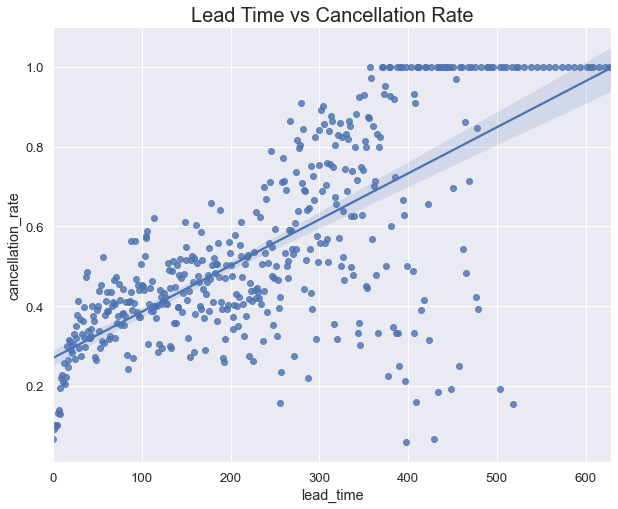

In [64]:
# regression plot of lead time and cancellation rate
plt.figure(figsize = (10,8))
sns.regplot(cancellation_rate.index, cancellation_rate.values)
plt.title('Lead Time vs Cancellation Rate', fontsize = 20)
plt.ylabel('cancellation_rate')

# Modelling

In [65]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year  \
0  Resort Hotel            0        342               2015   
1  Resort Hotel            0        737               2015   
2  Resort Hotel            0          7               2015   
3  Resort Hotel            0         13               2015   
4  Resort Hotel            0         14               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   7                        27                          1   
1                   7                        27                          1   
2                   7                        27                          1   
3                   7                        27                          1   
4                   7                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2         0       0   
1                        0                     0       2         0       0   
2                        0                     1       1         0       0   
3                        0                     1       1         0       0   
4                        0                     2       2         0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent company  \
0                  C                3   No Deposit    0.0     0.0   
1                  C                4   No Deposit    0.0     0.0   
2                  C                0   No Deposit    0.0     0.0   
3                  A                0   No Deposit  304.0     0.0   
4                  A                0   No Deposit  240.0     0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

  weekend_or_weekday  unyil  total_passenger  
0     undefined_data      0                2  
1     undefined_data      0                2  
2  stay_just_weekday      0                1  
3  stay_just_weekday      0                1  
4  stay_just_weekday      0                2

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int32  
 11  babies                          119390 non-null  int64  
 12  meal            

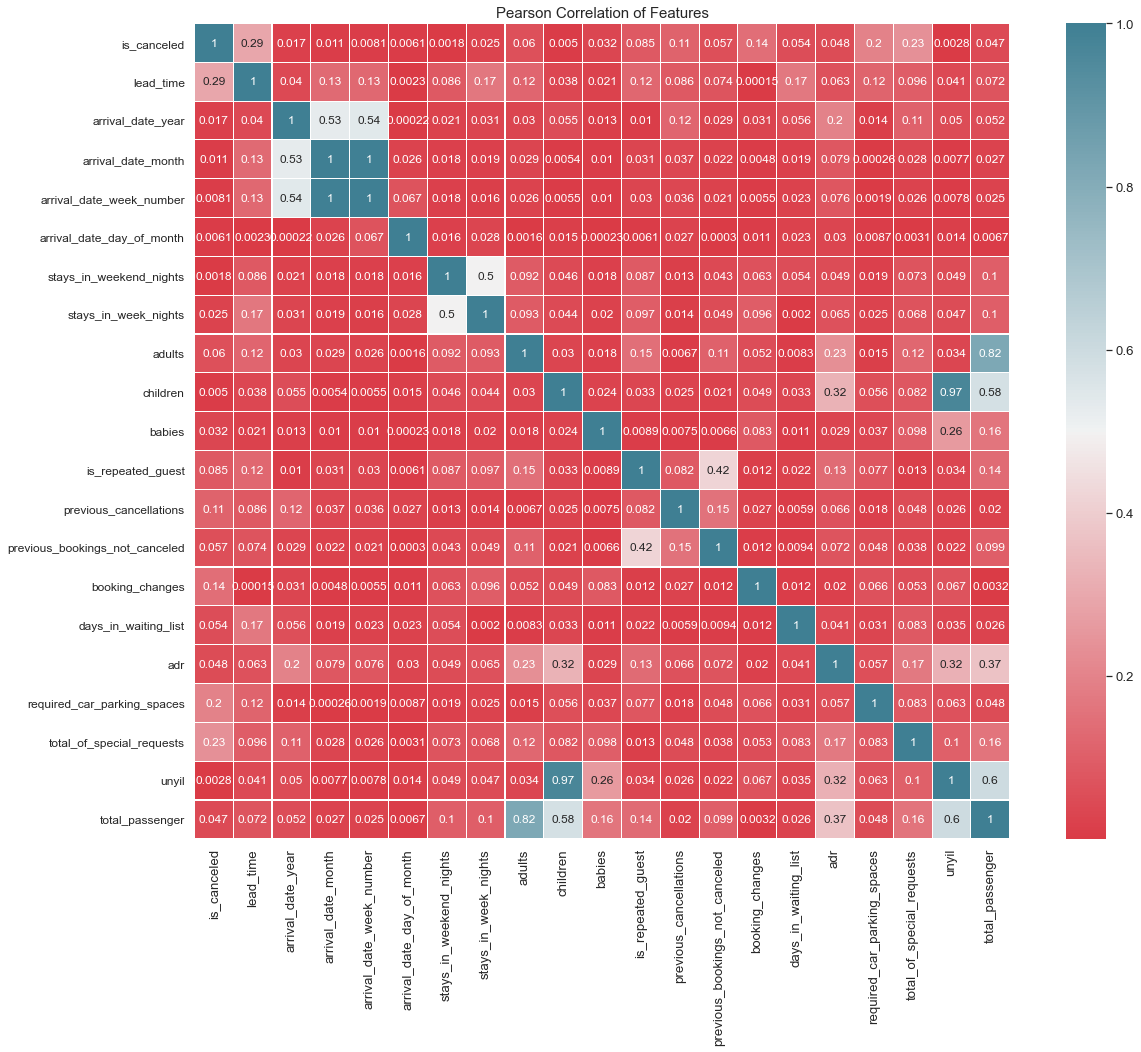

In [67]:
plt.figure(figsize=(20,15))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
g = sns.heatmap(data.corr().abs(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12)
plt.show()

In [68]:
from sklearn.preprocessing import LabelEncoder

# columns with dtype object
categorical_features = list(data.select_dtypes(include=['object']).columns)
categorical_features.remove('reservation_status_date')

# Label Encoder 
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    data[feature] = data[feature].astype(str)
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

data.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      1            0        342               2015                   7   
1      1            0        737               2015                   7   
2      1            0          7               2015                   7   
3      1            0         13               2015                   7   
4      1            0         14               2015                   7   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2         0       0   
1                        0                     0       2         0       0   
2                        0                     1       1         0       0   
3                        0                     1       1         0       0   
4                        0                     2       2         0       0   

   meal  country  market_segment  distribution_channel  is_repeated_guest  \
0     0      135               3                     1                  0   
1     0      135               3                     1                  0   
2     0       59               3                     1                  0   
3     0       59               2                     0                  0   
4     0       59               6                     3                  0   

   previous_cancellations  previous_bookings_not_canceled  reserved_room_type  \
0                       0                               0                   2   
1                       0                               0                   2   
2                       0                               0                   0   
3                       0                               0                   0   
4                       0                               0                   0   

   assigned_room_type  booking_changes  deposit_type  agent  company  \
0                   2                3             0      0        0   
1                   2                4             0      0        0   
2                   2                0             0      0        0   
3                   0                0             0    157        0   
4                   0                0             0    103        0   

   days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
0                     0              2   0.0                            0   
1                     0              2   0.0                            0   
2                     0              2  75.0                            0   
3                     0              2  75.0                            0   
4                     0              2  98.0                            0   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0                   1              2015-07-01   
1                          0                   1              2015-07-01   
2                          0                   1              2015-07-02   
3                          0                   1              2015-07-02   
4                          1                   1              2015-07-03   

   weekend_or_weekday  unyil  total_passenger  
0                   3      0                2  
1                   3      0                2  
2                   1      0                1  
3                   1      0                1  
4                   1      0                2

In [69]:
data.corr().abs()["is_canceled"].sort_values(ascending=False)

is_canceled                       1.000000
reservation_status                0.917196
deposit_type                      0.468634
lead_time                         0.293123
country                           0.267742
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
assigned_room_type                0.176028
distribution_channel              0.167600
booking_changes                   0.144381
hotel                             0.136531
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.077916
customer_type                     0.068140
reserved_room_type                0.061282
adults                            0.060017
market_segment                    0.059338
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
total_passenger                   0.046522
weekend_or_weekday                0.043923
babies     

In [70]:
# The features that are going to be used for the training and testing

hotel = data[['hotel', 'lead_time', 'adults', 'children', 'babies', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest',
   'previous_cancellations', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'unyil',
   'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'is_canceled', 'adr', 'total_passenger', 'weekend_or_weekday']].copy()

hotel.head()

hotel  lead_time  adults  children  babies  country  market_segment  \
0      1        342       2         0       0      135               3   
1      1        737       2         0       0      135               3   
2      1          7       1         0       0       59               3   
3      1         13       1         0       0       59               2   
4      1         14       2         0       0       59               6   

   distribution_channel  is_repeated_guest  previous_cancellations  \
0                     1                  0                       0   
1                     1                  0                       0   
2                     1                  0                       0   
3                     0                  0                       0   
4                     3                  0                       0   

   reserved_room_type  assigned_room_type  booking_changes  deposit_type  \
0                   2                   2                3             0   
1                   2                   2                4             0   
2                   0                   2                0             0   
3                   0                   0                0             0   
4                   0                   0                0             0   

   agent  unyil  days_in_waiting_list  required_car_parking_spaces  \
0      0      0                     0                            0   
1      0      0                     0                            0   
2      0      0                     0                            0   
3    157      0                     0                            0   
4    103      0                     0                            0   

   total_of_special_requests  is_canceled   adr  total_passenger  \
0                          0            0   0.0                2   
1                          0            0   0.0                2   
2                          0            0  75.0                1   
3                          0            0  75.0                1   
4                          1            0  98.0                2   

   weekend_or_weekday  
0                   3  
1                   3  
2                   1  
3                   1  
4                   1

In [71]:
from sklearn.model_selection import train_test_split

y = hotel["is_canceled"]
X = hotel.drop(["is_canceled"], axis=1)

In [72]:
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# checking the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print('Prosentase reservation di data Training adalah:')
print(y_train.value_counts(normalize=True))
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print('Prosentase reservation di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Shape of X_train: (83573, 22)
Shape of y_train: (83573,)
Prosentase reservation di data Training adalah:
0    0.630443
1    0.369557
Name: is_canceled, dtype: float64
Shape of X_test: (35817, 22)
Shape of y_test: (35817,)
Prosentase reservation di data Testing adalah:
0    0.627579
1    0.372421
Name: is_canceled, dtype: float64


## Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train, y_train)

print('Model Logistic Regression yang terbentuk adalah: \n', logreg)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [74]:
from sklearn.metrics import classification_report
##Training Model: Predict 
y_pred = logreg.predict(X_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.78      0.88      0.83     52688
           1       0.74      0.58      0.65     30885

    accuracy                           0.77     83573
   macro avg       0.76      0.73      0.74     83573
weighted avg       0.77      0.77      0.76     83573



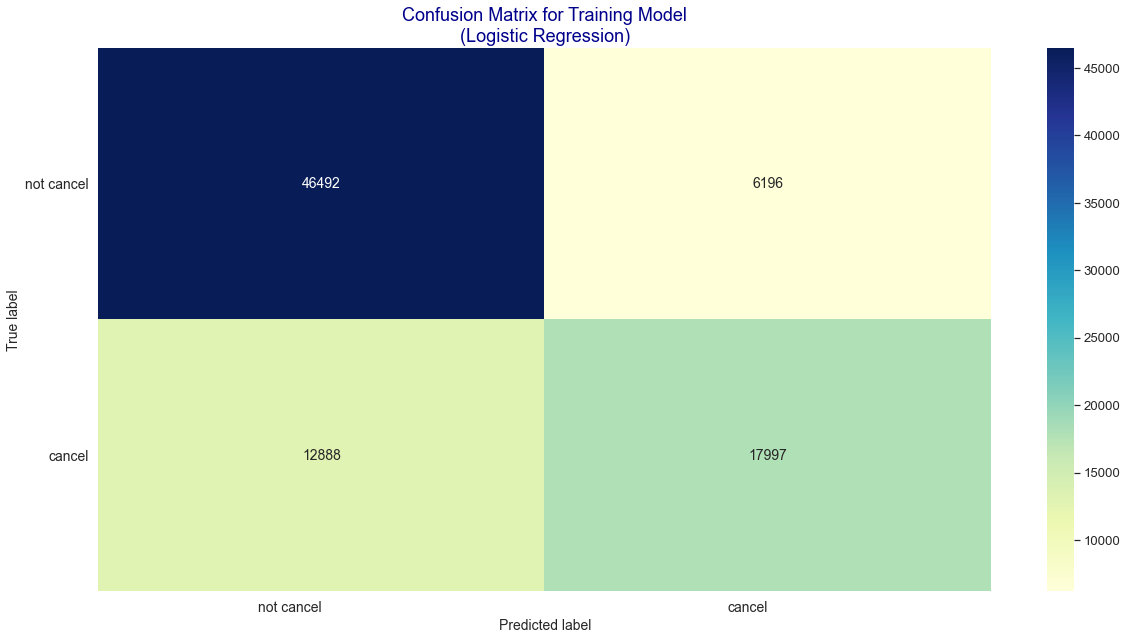

In [75]:
from sklearn.metrics import confusion_matrix

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_pred)), ('not cancel', 'cancel'), 
                                                                         ('not cancel', 'cancel'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [76]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = logreg.predict(X_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.78      0.88      0.83     22478
           1       0.75      0.58      0.65     13339

    accuracy                           0.77     35817
   macro avg       0.76      0.73      0.74     35817
weighted avg       0.77      0.77      0.76     35817



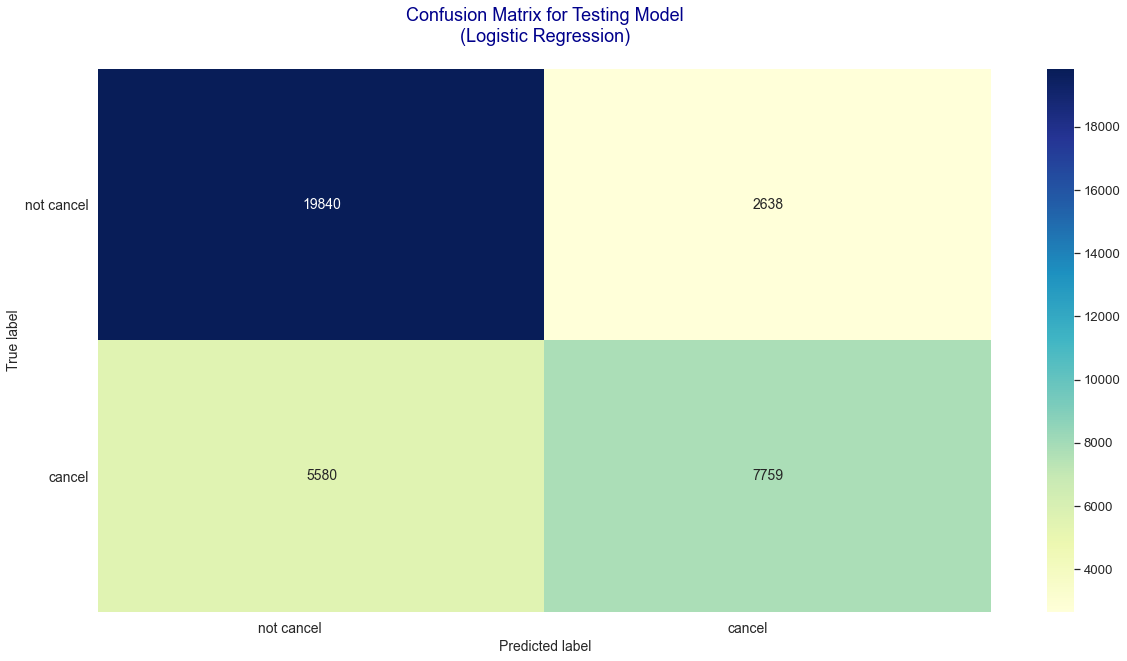

In [77]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('not cancel', 'cancel'), 
                                                                             ('not cancel', 'cancel'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

## Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier().fit(X_train, y_train)
print(rdf_model)

RandomForestClassifier()


In [79]:
from sklearn.metrics import classification_report
y_train_pred = rdf_model.predict(X_train)
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     52688
           1       1.00      0.99      0.99     30885

    accuracy                           0.99     83573
   macro avg       0.99      0.99      0.99     83573
weighted avg       0.99      0.99      0.99     83573



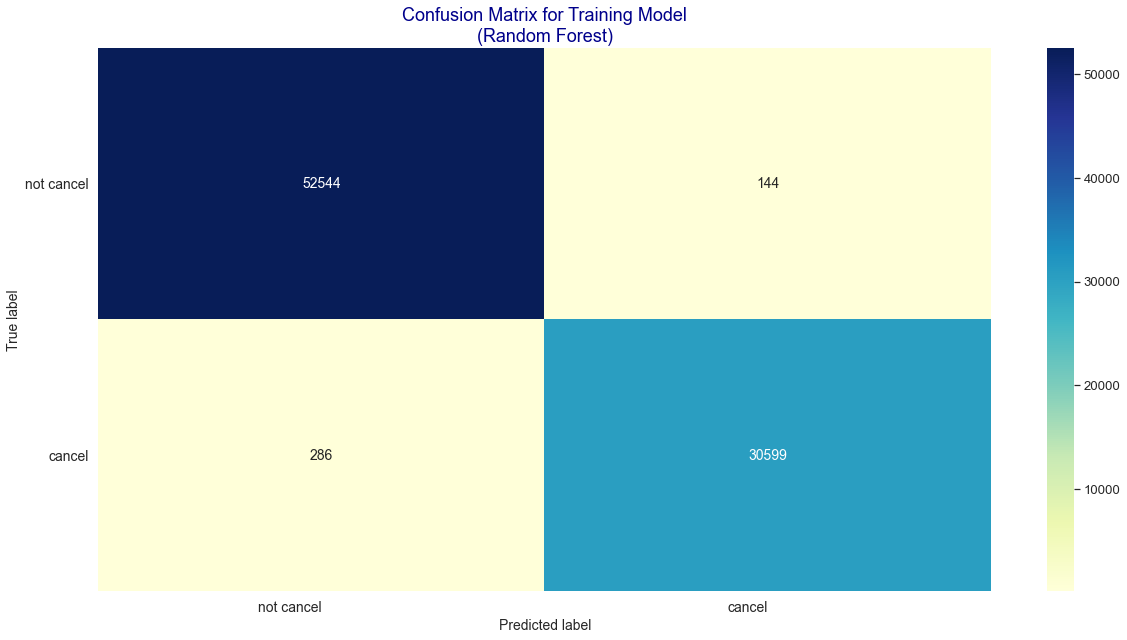

In [80]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), 
                                   ('not cancel', 'cancel'), ('not cancel', 'cancel'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [81]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = rdf_model .predict(X_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     22478
           1       0.87      0.80      0.83     13339

    accuracy                           0.88     35817
   macro avg       0.88      0.86      0.87     35817
weighted avg       0.88      0.88      0.88     35817



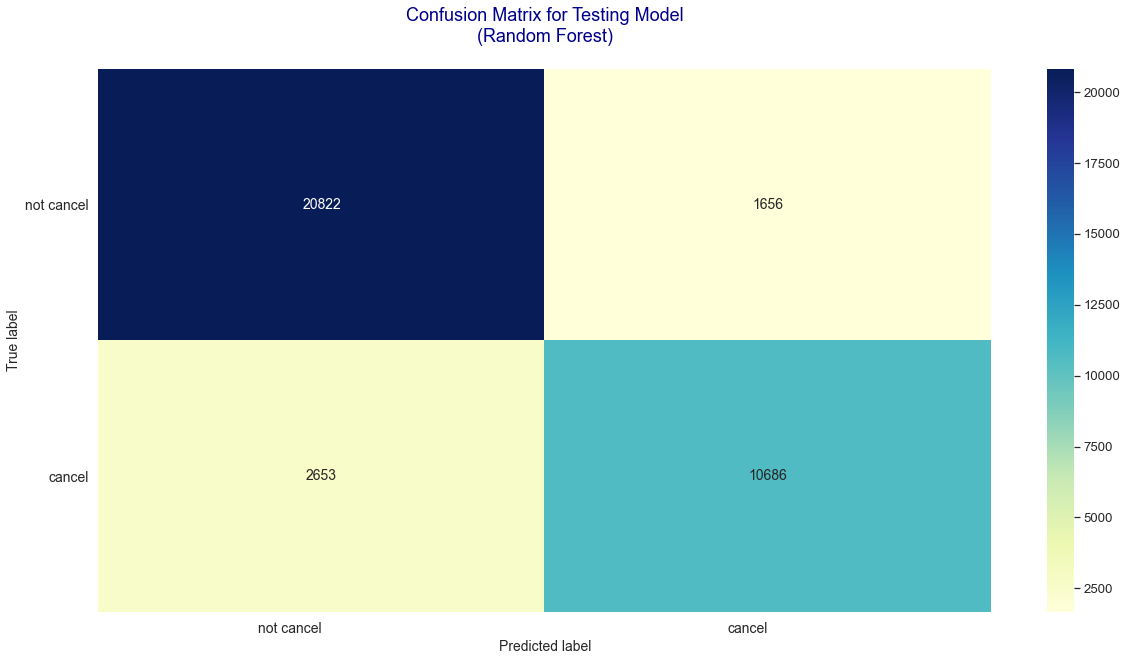

In [82]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), 
                                   ('not cancel', 'cancel'), ('not cancel', 'cancel'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

## XGBoost

In [83]:
from xgboost import XGBClassifier

In [84]:
xgb = XGBClassifier()
xgb_model = xgb.fit(X_train, y_train)
print(xgb_model)

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:16:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [85]:
# Predict
y_train_pred = xgb_model.predict(X_train)
# Print classification report
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     52688
           1       0.86      0.81      0.84     30885

    accuracy                           0.88     83573
   macro avg       0.88      0.87      0.87     83573
weighted avg       0.88      0.88      0.88     83573



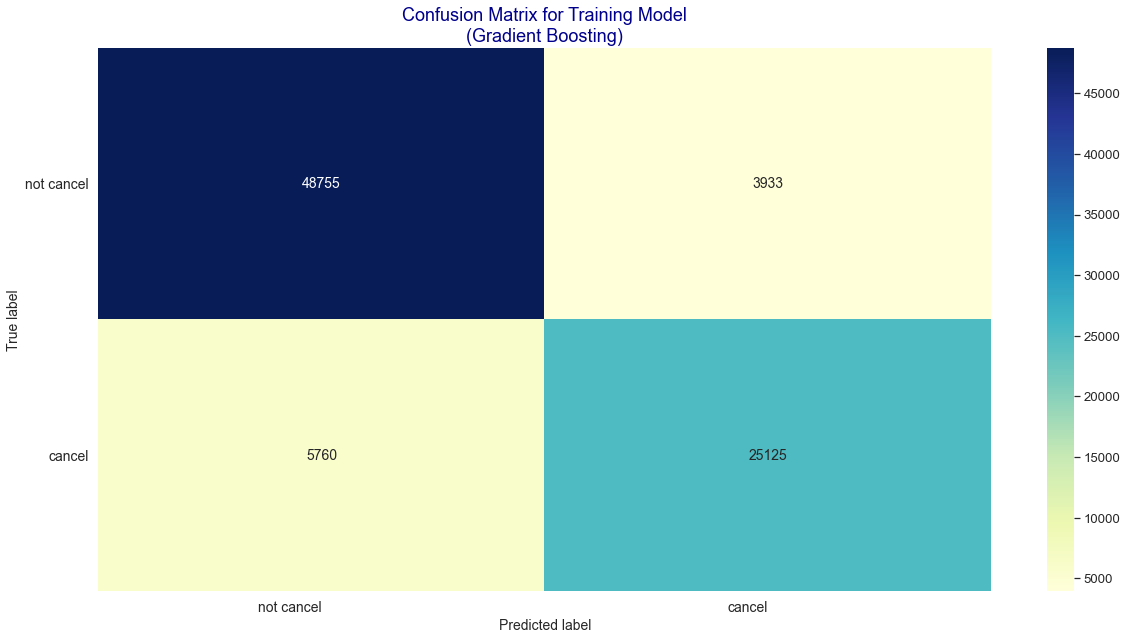

In [86]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), 
                                   ('not cancel', 'cancel'), ('not cancel', 'cancel'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [87]:
# Predict
y_test_pred = xgb_model.predict(X_test)
# Print classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     22478
           1       0.85      0.80      0.82     13339

    accuracy                           0.87     35817
   macro avg       0.87      0.86      0.86     35817
weighted avg       0.87      0.87      0.87     35817



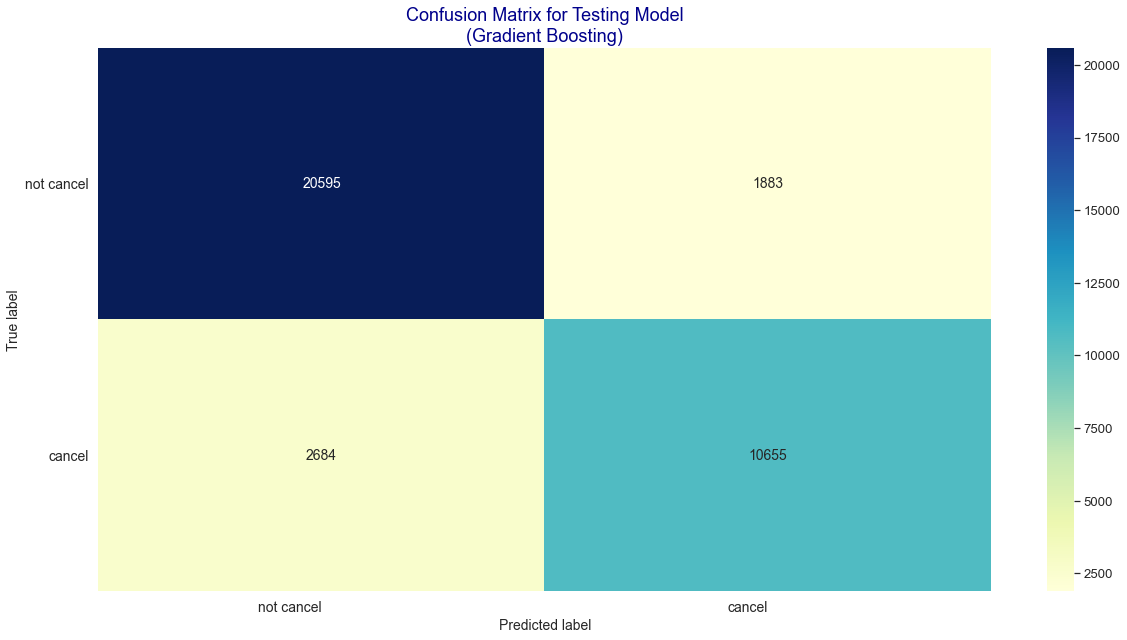

In [88]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), 
                                   ('not cancel', 'cancel'), ('not cancel', 'cancel'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()